In [1]:
# %load_ext kedro.extras.extensions.ipython
%reload_ext kedro.extras.extensions.ipython

2023-09-04 14:39:50,782 - kedro.extras.extensions.ipython - INFO - Updated path to Kedro project: /home/aws_baustro_bi02/risk-stream
2023-09-04 14:39:51,889 - kedro.framework.session.store - INFO - `read()` not implemented for `SQLiteStore`. Assuming empty store.


:: loading settings :: url = jar:file:/home/aws_baustro_bi02/env_dev/lib/python3.8/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/aws_baustro_bi02/.ivy2/cache
The jars for the packages stored in: /home/aws_baustro_bi02/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
com.crealytics#spark-excel_2.12 added as a dependency
com.amazon.deequ#deequ added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-2682c68f-8928-4600-85ba-a6ba0f83b581;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.2.2 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.563 in central
	found com.crealytics#spark-excel_2.12;0.13.1 in central
	found org.apache.poi#poi;4.1.0 in central
	found commons-codec#commons-codec;1.12 in central
	found org.apache.commons#commons-collections4;4.3 in central
	found org.apache.commons#commons-math3;3.6.1 in central
	found org.apache.poi#poi-ooxml;4.1.0 in central
	found org.apache.poi#poi-ooxml-schemas;4.1.0 in central
	found org.apache.xmlbeans#xmlbeans;3.1.0 in central
	found com.github.virtuald#curvesapi;1.06 in centr

2023-09-04 14:39:59,860 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials


/home/aws_baustro_bi02/env_dev/lib/python3.8/site-packages/hdfs/config.py:15: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import load_source


2023-09-04 14:40:00,136 - kedro.extras.extensions.ipython - INFO - ** Kedro project risk-stream
2023-09-04 14:40:00,137 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2023-09-04 14:40:01,376 - kedro.extras.extensions.ipython - INFO - Registered line magic `run_viz`


In [36]:
# display all columns
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

# mute warnings
import warnings
warnings.filterwarnings('ignore')

# df shape
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

# spark DF
from pyspark.sql import SparkSession
spark = SparkSession.getActiveSession()

# funciones
from risk_stream.utils.commons import (get_last_register, 
                                       add_prefix_in_columns, 
                                       _create_yyyy_mm, 
                                       add_date_given_month_year, 
                                       cast_dataframe_columns, 
                                       dates_window_given_datecut
                                      )

import pyspark.sql.functions as F
from pyspark.sql import DataFrame

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, kruskal
import scikit_posthocs as sp

import risk_stream.utils.eda as eda

from risk_stream.utils.credit_scoring import tabla_resumen

In [3]:
from functools import reduce
def _fill_na_none(df, value, subset=None):
    if subset is None:
        columns_to_fill = df.columns
    else:
        columns_to_fill = subset
    
    df = (reduce(lambda reduce_df, 
                        col_name: (reduce_df
                                   .withColumn(col_name,
                                               F.when(F.col(col_name).isNull(), value)
                                               .otherwise(F.col(col_name))
                                              )
                                  ),
                        columns_to_fill,
                        df
                       )
                )
    return df

In [ ]:
pd.set_option('display.max_colwidth', None)
# notacion cientifica
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# spark df
real_estimado_pd = pd.DataFrame({"real": y_test, "pred": clf.predict(X_test)})
activo = spark.createDataFrame(activo)

# write, read
leads_nptb_1 = pd.read_csv('leads_nptb_1.csv', sep='|', encoding = "ISO-8859-1")
df_pivot_zero_pd.to_csv('resultados_score_no_ceros_campaigns_AA.csv', index=False, sep='|', decimal='.', encoding='utf-8-sig')

Resultado_Cedulas_Producto_1 = pd.read_excel('Resultado_Cedulas_Producto_1.xlsx')

# prefix, fillna
ingresos_validados_productosBdA = ingresos_validados_productosBdA.fillna(0, subset = variables_clienteBDA)

fea_cliente = add_prefix_in_columns(fea_cliente, "demo_", exclude=key_client_columns)

# ~

buro_var_resumen = [s for s in prm_buro.columns if buro_vars_resumen[0][2::1] in s]
_data = (prm_buro
         .withColumn(buro_vars_resumen[0], sum([F.col(c) for c in buro_var_resumen]))
        )
for i in range(1, len(buro_vars_resumen)):
    buro_var_resumen = [s for s in prm_buro.columns if buro_vars_resumen[i][2::1] in s]
    _data = (_data
             .withColumn(buro_vars_resumen[i], sum([F.col(c) for c in buro_var_resumen]))
            )

_data = (_data
         .select([s for s in _data.columns if 'b_' in s] + ["fecha_observacion", "marca_bancarizado"])
        )

# plt axis
plt.xlabel("propensión")
plt.ylabel("count")

# barplot
pd_barplot = data["DEMO_oficio"].value_counts().to_frame()
pd_barplot.reset_index(inplace=True)
pd_barplot = pd_barplot.rename(columns={"DEMO_oficio": "count", "index": "DEMO_oficio"})
pd_barplot.plot.bar(x='DEMO_oficio', y='count', rot=90, figsize=(9,3), legend=False)
plt.ylabel("count")

# Data

In [4]:
# prm_cliente_captaciones_aho_mon = catalog.load("prm_cliente_captaciones_aho_mon")
# prm_transacciones_consolidado = catalog.load("prm_transacciones_consolidado")
# prm_cliente_captaciones_plazo = catalog.load("prm_cliente_captaciones_plazo")


# prm_riesgo_hist_R04 = catalog.load("prm_riesgo_hist_R04")

# prm_riesgo_hist_R22 = catalog.load("prm_riesgo_hist_R22")
# prm_transacciones_tarjeta_credito = catalog.load("prm_transacciones_tarjeta_credito")

fea_cliente_nat_estimacion = catalog.load("fea_cliente_nat_estimacion")

fea_buro_sum = catalog.load("fea_buro_sum")
fea_buro = catalog.load("fea_buro")
raw_ingresos_iess_consolidado = catalog.load("raw_ingresos_iess_consolidado")

# fea_clientes_activos = catalog.load("fea_clientes_activos")

# master_model_005_v1 = catalog.load("master_model_005_v1")

2023-09-04 14:41:15,666 - kedro.io.data_catalog - INFO - Loading data from `fea_cliente_nat_estimacion` (SparkDataSet)...
2023-09-04 14:41:17,789 - kedro.io.data_catalog - INFO - Loading data from `fea_buro_sum` (SparkDataSet)...
2023-09-04 14:41:17,931 - kedro.io.data_catalog - INFO - Loading data from `fea_buro` (SparkDataSet)...
2023-09-04 14:41:18,105 - kedro.io.data_catalog - INFO - Loading data from `raw_ingresos_iess_consolidado` (SparkDataSet)...


23/09/04 14:41:18 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties


In [5]:
from pyspark.sql import Window

def _delete_duplicates_iess_prospectos(df):
    windowSpec_pros  = Window.partitionBy("codigo_cliente").orderBy(F.asc("fecha_ing_afi_iess"),F.desc('salario_iess'))
    
    df = (df
          .withColumn("row_number_prospecto",
                      F.when(F.col('fecha_ing_afi_iess').isNull(),F.lit(1))
                      .when(F.col('codigo_cliente').isNull(),F.lit(1))
                      .otherwise(F.row_number().over(windowSpec_pros))
                     )
          .filter(F.col('row_number_prospecto').isin(1))
          .drop('row_number_prospecto')
         )
    
    return df

In [6]:
data_filtros_analisis_score = pd.read_csv('data_filtros_analisis_score.csv', sep=',', encoding = "ISO-8859-1")
data_filtros_analisis_score = spark.createDataFrame(data_filtros_analisis_score)

prm_sri_catastro = catalog.load("prm_sri_catastro")
fea_cliente_enriquecido_activo = catalog.load("fea_cliente_enriquecido_activo")

2023-09-04 14:41:48,637 - kedro.io.data_catalog - INFO - Loading data from `prm_sri_catastro` (SparkDataSet)...
2023-09-04 14:41:48,708 - kedro.io.data_catalog - INFO - Loading data from `fea_cliente_enriquecido_activo` (SparkDataSet)...


In [7]:
campanias = ["FILTROS_CLIENTES",
             "Training15k", "Training21k", "Training100k",
             "Retraining_MEI_Propension", "Retraining_MEI_2",
             "Data_EI"]

df = (fea_buro
      .filter(F.col("tipo").isin(campanias))
      .filter("marca_bancarizado = 'Bancarizado'")
      .filter(F.col("decision_score").isNotNull())
      .filter(~F.col("codigo_cliente").isin("AB178174", "AB801532", "AB809517", "AB344375", "AB614247", "AB808697"))
      .drop("tipo")
      .distinct()
     )

df = add_date_given_month_year(df, "mm_snapshot", "yyyy_snapshot", "fecha")
df = get_last_register(df, ["codigo_cliente"], "fecha")
# df = get_last_register(df, ["codigo_cliente"], "b_cant_ocor_vig_3")
df = get_last_register(df, ["codigo_cliente"], "ingreso")
df = df.filter("fecha >= '2022-01-01'")

In [8]:
import pyspark
from pyspark.sql import SparkSession
import yaml

 
user = "aws_baustro_bi02"
credentials = yaml.safe_load(open(fr"/home/{user}/risk-stream/conf/local/credentials.yml",'r'))
accessKeyId = credentials['dev_s3'].get('key')
secretAccessKey = credentials['dev_s3'].get('secret') 

spark = SparkSession.builder \
            .config("spark.jars.packages","org.apache.hadoop:hadoop-aws:3.1.1") \
            .appName("app_name") \
            .getOrCreate() 

spark._jsc.hadoopConfiguration().set("fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem")
spark._jsc.hadoopConfiguration().set("fs.s3a.aws.credentials.provider", "com.amazonaws.auth.DefaultAWSCredentialsProviderChain")

spark._jsc.hadoopConfiguration().set("fs.s3a.awsAccessKeyId", accessKeyId)
spark._jsc.hadoopConfiguration().set("fs.s3a.awsSecretAccessKey", secretAccessKey)

# df.toPandas().to_csv('s3://dataanalysis-austrodata/EXPERIMENTS/data_filtros_analisis.csv', index=False, sep='|', decimal='.', encoding='utf-8-sig')

# data_filtros_analisis:
#   <<: *csv_dataset
#   filepath: ${base_path_pandas}/EXPERIMENTS/data_filtros_analisis.csv
#   load_args:
#     delimiter: "|"
#     encoding: "utf-8-sig"

In [8]:
equifax_cols = ["codigo_cliente", "yyyy_snapshot", "mm_snapshot", "gasto_hogar", "score_v4", 
                "decision_final", "ingreso", "indicador_covid"]

campanias = ["FILTROS_CLIENTES",
             "Training15k", "Training21k", "Training100k",
             "Retraining_MEI_Propension", "Retraining_MEI_2",
             "Data_EI"]

df = (data_filtros_analisis_score
      .select("codigo_cliente", "yyyy_snapshot", "mm_snapshot", "score_riesgo_AA", "calificacion_riesgo_AA")
     )

equifax_df = (fea_buro
              .filter(F.col("tipo").isin(campanias))
              .filter("marca_bancarizado = 'Bancarizado'")
              # .filter(F.col("decision_score").isNotNull())
              .filter(~F.col("codigo_cliente").isin("AB178174", "AB801532", "AB809517", "AB344375", "AB614247", "AB808697"))
              .select(equifax_cols)
              .distinct()
             )

sri_df = (prm_sri_catastro
          .select("codigo_cliente", "fecha_inicio_actividades",
                  "fecha_suspension_definitiva", "fecha_reinicio_actividades")
          .distinct()
         )

iess_df = (raw_ingresos_iess_consolidado
           .withColumnRenamed("v19", "yyyy_snapshot")
           .withColumnRenamed("mes", "mm_snapshot")
           .withColumnRenamed("numafi", "codigo_cliente")
           .withColumnRenamed("fecingafi", "fecha_ing_afi_iess")
           .withColumnRenamed("salario", "salario_iess")
           
           .select("codigo_cliente", "yyyy_snapshot", "mm_snapshot", 
                   "salario_iess", "fecha_ing_afi_iess", "fecsalafi")
           .distinct()
          )

demo_df = (fea_cliente_enriquecido_activo
           .select("codigo_cliente", "fecha_nacimiento_rc")
           .distinct()
          )

demo_2_df = (catalog.load("prm_registro_civil")
           .select("codigo_cliente", "des_ciudadania")
           .distinct()
          )

df_ = (df
       .join(demo_df, "codigo_cliente")
       .join(iess_df, ["codigo_cliente", "yyyy_snapshot", "mm_snapshot"], "left")
       .join(sri_df, ["codigo_cliente"], "left")
      )

2023-09-04 14:42:01,881 - kedro.io.data_catalog - INFO - Loading data from `prm_registro_civil` (SparkDataSet)...


In [9]:
df_ = (df_
         .withColumn('fecha_ing_afi_iess',
                     F.coalesce(
                         F.to_date(df_.fecha_ing_afi_iess,"dd/MM/yyyy H:mm:ss"),
                         F.to_date(df_.fecha_ing_afi_iess,"dd/MM/yyyy HH:mm:ss"),
                         F.to_date(df_.fecha_ing_afi_iess,"dd/MM/yyyy"),
                         F.to_date(df_.fecha_ing_afi_iess,"dd/M/yyyy"),
                         F.to_date(df_.fecha_ing_afi_iess,"d/MM/yyyy"),
                     )
                    )
         .withColumn('fecsalafi',
                     F.coalesce(
                         F.to_date(df_.fecsalafi,"dd/MM/yyyy H:mm:ss"),
                         F.to_date(df_.fecsalafi,"dd/MM/yyyy HH:mm:ss"),
                         F.to_date(df_.fecsalafi,"dd/MM/yyyy"),
                         F.to_date(df_.fecsalafi,"dd/M/yyyy"),
                         F.to_date(df_.fecsalafi,"d/MM/yyyy"),
                     )
                    )
        )

df_ = add_date_given_month_year(df_, "mm_snapshot", "yyyy_snapshot", "fecha")

df_ = (_delete_duplicates_iess_prospectos(df_)
       .withColumn("flag_dependencia",
                   F.when((F.col("fecha_ing_afi_iess").isNull()) | (F.col("fecsalafi") < F.col("fecha")),
                          "independiente")
                   .otherwise("dependiente")
                  )
      )

df_ = (df_
       # .filter("calificacion_riesgo_AA != 'ANALISIS'") # HEEEEEEERE
       # .withColumn("target", 
       #             F.when(F.col("calificacion_riesgo_AA").isin("RECHAZAR"), 1)
       #             .otherwise(0)
       #            )
       .withColumn("estabilidad_laboral", F.months_between(F.col("fecha"), F.col("fecha_ing_afi_iess")))
       .withColumn("edad", F.months_between(F.col("fecha"), F.col("fecha_nacimiento_rc"))/12)
       .withColumn("antiguedad_ruc",
                   F.when(F.col("fecha_reinicio_actividades").isNull(),
                          F.months_between(F.col("fecha"), F.col("fecha_inicio_actividades"))
                         )
                   .otherwise(F.months_between(F.col("fecha"), F.col("fecha_reinicio_actividades")))
                  )
       .withColumn("flag_dependencia",
                   F.when((F.col("flag_dependencia") == "independiente") &
                          ((F.col("fecha_inicio_actividades").isNull()) |
                           ( ((F.col("fecha_suspension_definitiva").isNotNull()) | (F.col("fecha_suspension_definitiva") < F.col("fecha"))) & ((F.col("fecha_reinicio_actividades").isNull())) | (F.col("fecha_reinicio_actividades") < F.col("fecha_suspension_definitiva")))),
                          "independiente_informal"
                         )
                   .when(F.col("flag_dependencia") == "independiente", "independiente_formal")
                   .otherwise(F.col("flag_dependencia"))
                  )
      ).persist()

In [10]:
df_equi = (df_
 .join(equifax_df, ["codigo_cliente", "yyyy_snapshot", "mm_snapshot"])
 .distinct()
)

df_equi = get_last_register(df_equi, ["codigo_cliente"], "ingreso")

df_equi = (df_equi
           .join(demo_2_df, ["codigo_cliente"]) 
          )

In [13]:
(df_equi
 .groupBy("flag_dependencia")
 .count()
 .orderBy(F.desc("count"))
 .toPandas()
)

,flag_dependencia,count
0,independiente_formal,7544
1,independiente_informal,6691
2,dependiente,6306


In [14]:
policia = ["MILITAR SERVICIO ACTIVO", "POLICIA SERVICIO ACTIVO"]

(df_equi
 .withColumn("flag_policia",
             F.when(F.col("des_ciudadania").isin(policia), "POLICIA")
             .otherwise("NO_POLICIA")
            )
 .drop("fecha_nacimiento_rc", "fecha_ing_afi_iess", 
       "fecsalafi", "fecha_inicio_actividades", "fecha_suspension_definitiva", 
       "fecha_reinicio_actividades", "target", "des_ciudadania")
 # .distinct()
 # .filter(F.col("decision_final").isNull())
 # .limit(5)
 .toPandas()
 .to_csv('simulacion_campanias_2.csv', index=False, sep='|', decimal='.', encoding='utf-8-sig')
 # .count()
)

In [17]:
policia = ["MILITAR SERVICIO ACTIVO", "POLICIA SERVICIO ACTIVO"]

dataf = (df_equi
 .filter(~F.col("des_ciudadania").isin(policia))
)

In [235]:
(dataf
 .filter("calificacion_riesgo_AA != 'ANALISIS'")
 .groupBy("flag_dependencia")
 .count()
 .orderBy(F.desc("count"))
 # .limit(5)
 .toPandas()
)

,flag_dependencia,count
0,independiente_formal,4796
1,independiente_informal,4459
2,dependiente,4061


## dependiente

In [245]:
paleta = {"A":"#A5CFE3", "AA":"#01949A", "AAA":"#004369", "RECHAZAR":"#DB1F48"}
h_order = ["AAA", "AA", "A", "RECHAZAR"]

### edad

In [253]:
edad_df = (dataf
 .filter("flag_dependencia = 'dependiente'")
 .filter("score_riesgo_AA > 410") # HEEEEERE
 .withColumn("edad_analisis",
             F.when(F.col("edad") <= 21, "menor_igual_21")
             .when((F.col("edad") > 21) & (F.col("edad") <=  23), "21_23")
             .when((F.col("edad") > 23) & (F.col("edad") <=  25), "23_25")
             .when((F.col("edad") > 25) & (F.col("edad") <=  60), "25_60")
             .when((F.col("edad") > 60) & (F.col("edad") <=  65), "60_65")             
             .otherwise("mayor_65")
            )
 .toPandas()
)

edad_df["edad_analisis"].value_counts()

25_60             5863
60_65              221
mayor_65            61
23_25               59
21_23               31
menor_igual_21       7
Name: edad_analisis, dtype: int64

In [101]:
edad_df.head()

,codigo_cliente,yyyy_snapshot,mm_snapshot,score_riesgo_AA,calificacion_riesgo_AA,fecha_nacimiento_rc,salario_iess,fecha_ing_afi_iess,fecsalafi,fecha_inicio_actividades,fecha_suspension_definitiva,fecha_reinicio_actividades,fecha,flag_dependencia,estabilidad_laboral,edad,antiguedad_ruc,gasto_hogar,score_v4,decision_final,ingreso,indicador_covid,des_ciudadania,edad_analisis
0,AA220359,2023,07,505.00000,RECHAZAR,1983-01-04,NaN,None,None,2006-11-24,2010-07-13,None,2023-07-31,independiente_informal,NaN,40.57258,200.22581,NaN,NaN,None,1783.16003,None,DISCAPACIDAD AUDITIVA MAYOR DE EDAD,25_60
1,AA499584,2022,08,784.00000,A,1956-03-07,NaN,None,None,2006-06-21,2021-01-26,None,2022-08-31,independiente_informal,NaN,66.48118,194.32258,NaN,NaN,None,2119.29004,None,CIUDADANO,mayor_65
2,AB110284,2023,07,688.00000,ANALISIS,1976-03-20,NaN,None,None,2019-04-10,2019-04-10,None,2023-07-31,independiente_informal,NaN,47.36290,51.67742,NaN,NaN,None,2691.10010,None,CIUDADANO,25_60
3,AB025576,2023,07,298.00000,RECHAZAR,1982-01-12,NaN,None,None,2014-07-01,2021-08-23,2018-11-05,2023-07-31,independiente_informal,NaN,41.55108,56.83871,NaN,NaN,None,2243.67993,None,CIUDADANO,25_60
4,AC210245,2022,08,632.00000,ANALISIS,1996-10-28,NaN,None,None,None,None,None,2022-08-31,independiente_informal,NaN,25.84140,NaN,NaN,NaN,None,646.39001,None,CIUDADANO,25_60


In [79]:
performance1 = edad_df.query("edad_analisis == 'menor_igual_21'")["score_riesgo_AA"]
performance2 = edad_df.query("edad_analisis == '21_23'")["score_riesgo_AA"]
performance3 = edad_df.query("edad_analisis == '23_25'")["score_riesgo_AA"]
performance4 = edad_df.query("edad_analisis == '25_60'")["score_riesgo_AA"]
performance5 = edad_df.query("edad_analisis == '60_65'")["score_riesgo_AA"]
performance6 = edad_df.query("edad_analisis == 'mayor_65'")["score_riesgo_AA"]

print(f_oneway(performance1, performance2, performance3, performance4, performance5, performance6))
print(kruskal(performance1, performance2, performance3, performance4, performance5, performance6))

F_onewayResult(statistic=22.698007675059685, pvalue=1.2153748177090837e-22)
KruskalResult(statistic=100.31064508914166, pvalue=4.5455041624774465e-20)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'menor_igual_21'),
  Text(1, 0, '21_23'),
  Text(2, 0, '23_25'),
  Text(3, 0, '25_60'),
  Text(4, 0, '60_65'),
  Text(5, 0, 'mayor_65')])

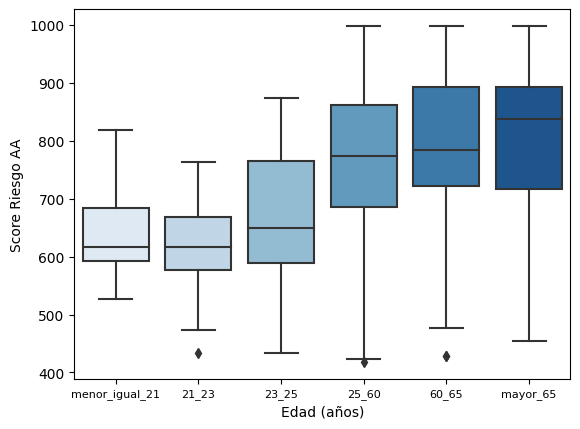

In [206]:
my_plot = sns.boxplot(x='edad_analisis',
            y='score_riesgo_AA',
            data=edad_df,
            order=['menor_igual_21', '21_23', '23_25', '25_60', '60_65', 'mayor_65'],
            palette="Blues"
           )

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=0)

plt.xlabel("Edad (años)")
plt.ylabel("Score Riesgo AA")
plt.xticks(fontsize=8)
# plt.tight_layout()

In [83]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_scheffe(edad_df, val_col='score_riesgo_AA', group_col='edad_analisis')

,25_60,21_23,23_25,60_65,mayor_65,menor_igual_21
25_60,1.00000,0.00000,0.00000,0.24529,0.40507,0.19939
21_23,0.00000,1.00000,0.62996,0.00000,0.00000,0.99619
23_25,0.00000,0.62996,1.00000,0.00000,0.00000,0.99950
60_65,0.24529,0.00000,0.00000,1.00000,0.98742,0.08265
mayor_65,0.40507,0.00000,0.00000,0.98742,1.00000,0.05536
menor_igual_21,0.19939,0.99619,0.99950,0.08265,0.05536,1.00000


In [84]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_dunn(edad_df, val_col='score_riesgo_AA', group_col='edad_analisis')

,21_23,23_25,25_60,60_65,mayor_65,menor_igual_21
21_23,1.00000,0.07639,0.00000,0.00000,0.00000,0.65521
23_25,0.07639,1.00000,0.00000,0.00000,0.00000,0.60594
25_60,0.00000,0.00000,1.00000,0.01017,0.01671,0.00819
60_65,0.00000,0.00000,0.01017,1.00000,0.36187,0.00219
mayor_65,0.00000,0.00000,0.01671,0.36187,1.00000,0.00105
menor_igual_21,0.65521,0.60594,0.00819,0.00219,0.00105,1.00000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'menor_igual_21'),
  Text(1, 0, '21_23'),
  Text(2, 0, '23_25'),
  Text(3, 0, '25_60'),
  Text(4, 0, '60_65'),
  Text(5, 0, 'mayor_65')])

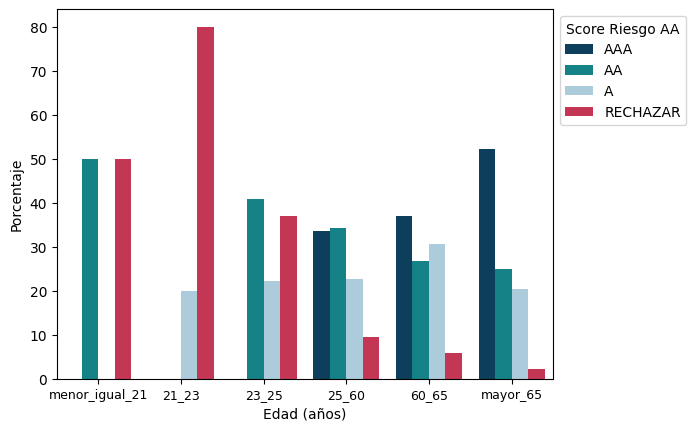

In [255]:
df_plt = edad_df.query("calificacion_riesgo_AA != 'ANALISIS'")
df_plt = df_plt.groupby(['edad_analisis', 'calificacion_riesgo_AA']).size()
df_plt = df_plt.reset_index()
df_plt = df_plt.rename(columns={0: "count"})
df_plt["percentage"] = df_plt["count"]*100/df_plt.groupby(['edad_analisis'])['count'].transform('sum')

sns.barplot(x="edad_analisis",
            y="percentage",
            hue="calificacion_riesgo_AA",
            order=['menor_igual_21', '21_23', '23_25', '25_60', '60_65', 'mayor_65'],
            data=df_plt,
            palette=paleta,
            hue_order = h_order
            # palette="cubehelix" #"cubehelix" # "magma"
           )

plt.xlabel("Edad (años)")
plt.ylabel("Porcentaje")
plt.legend(title="Score Riesgo AA", loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(fontsize=9)
# plt.show()

### estabilidad_laboral

In [207]:
estabilidad_laboral_df = (dataf
 .filter("flag_dependencia = 'dependiente'")
 .filter("score_riesgo_AA > 400") # HEEEEERE
 .withColumn("estabilidad_laboral_analisis",
             F.when(F.col("estabilidad_laboral") <= 8, "menor_igual_8")
             .when((F.col("estabilidad_laboral") > 8) & (F.col("estabilidad_laboral") <=  9), "8_9")             
             .when((F.col("estabilidad_laboral") > 9) & (F.col("estabilidad_laboral") <=  10), "9_10")
             .when((F.col("estabilidad_laboral") > 10) & (F.col("estabilidad_laboral") <=  11), "10_11")
             .when((F.col("estabilidad_laboral") > 11) & (F.col("estabilidad_laboral") <=  12), "11_12")             
             .otherwise("mayor_12")
            )
 .toPandas()
)

estabilidad_laboral_df["estabilidad_laboral_analisis"].value_counts()

mayor_12         5305
menor_igual_8     675
9_10               88
10_11              79
8_9                61
11_12              45
Name: estabilidad_laboral_analisis, dtype: int64

In [42]:
performance1 = estabilidad_laboral_df.query("estabilidad_laboral_analisis == 'menor_igual_8'")["score_riesgo_AA"]
performance2 = estabilidad_laboral_df.query("estabilidad_laboral_analisis == '8_9'")["score_riesgo_AA"]
performance3 = estabilidad_laboral_df.query("estabilidad_laboral_analisis == '9_10'")["score_riesgo_AA"]
performance4 = estabilidad_laboral_df.query("estabilidad_laboral_analisis == '10_11'")["score_riesgo_AA"]
performance5 = estabilidad_laboral_df.query("estabilidad_laboral_analisis == '11_12'")["score_riesgo_AA"]
performance6 = estabilidad_laboral_df.query("estabilidad_laboral_analisis == 'mayor_12'")["score_riesgo_AA"]

print(f_oneway(performance1, performance2, performance3, performance4, performance5, performance6))
print(kruskal(performance1, performance2, performance3, performance4, performance5, performance6))

F_onewayResult(statistic=11.744706871017135, pvalue=2.524036903473146e-11)
KruskalResult(statistic=63.93874939504998, pvalue=1.860181004817246e-12)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'menor_igual_8'),
  Text(1, 0, '8_9'),
  Text(2, 0, '9_10'),
  Text(3, 0, '10_11'),
  Text(4, 0, '11_12'),
  Text(5, 0, 'mayor_12')])

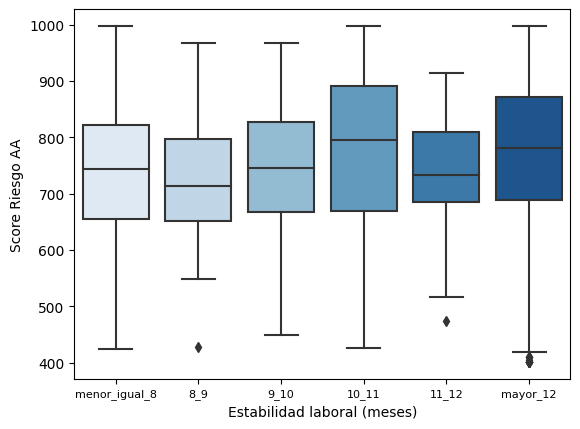

In [208]:
sns.boxplot(x='estabilidad_laboral_analisis',
            y='score_riesgo_AA',
            data=estabilidad_laboral_df,
            order=['menor_igual_8', '8_9', '9_10', '10_11', '11_12', 'mayor_12'],
            palette="Blues"
           )

plt.xlabel("Estabilidad laboral (meses)")
plt.ylabel("Score Riesgo AA")
plt.xticks(fontsize=8)

In [44]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_scheffe(estabilidad_laboral_df, val_col='score_riesgo_AA', group_col='estabilidad_laboral_analisis')

,mayor_12,menor_igual_8,10_11,11_12,9_10,8_9
mayor_12,1.00000,0.00000,0.99981,0.53152,0.42501,0.09351
menor_igual_8,0.00000,1.00000,0.24989,0.99997,0.99992,0.97107
10_11,0.99981,0.24989,1.00000,0.64888,0.67565,0.26690
11_12,0.53152,0.99997,0.64888,1.00000,0.99970,0.99894
9_10,0.42501,0.99992,0.67565,0.99970,1.00000,0.97130
8_9,0.09351,0.97107,0.26690,0.99894,0.97130,1.00000


In [45]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_dunn(estabilidad_laboral_df, val_col='score_riesgo_AA', group_col='estabilidad_laboral_analisis')

,10_11,11_12,8_9,9_10,mayor_12,menor_igual_8
10_11,1.00000,0.05893,0.00739,0.06982,0.77729,0.00885
11_12,0.05893,1.00000,0.59725,0.69549,0.03218,0.78783
8_9,0.00739,0.59725,1.00000,0.29200,0.00098,0.27726
9_10,0.06982,0.69549,0.29200,1.00000,0.02055,0.78922
mayor_12,0.77729,0.03218,0.00098,0.02055,1.00000,0.00000
menor_igual_8,0.00885,0.78783,0.27726,0.78922,0.00000,1.00000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'menor_igual_8'),
  Text(1, 0, '8_9'),
  Text(2, 0, '9_10'),
  Text(3, 0, '10_11'),
  Text(4, 0, '11_12'),
  Text(5, 0, 'mayor_12')])

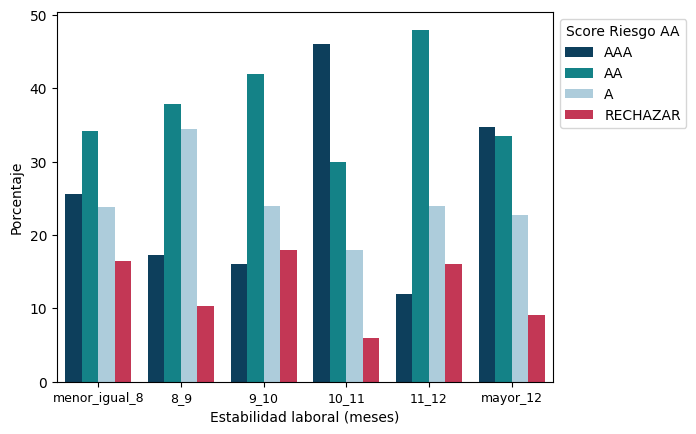

In [256]:
df_plt = estabilidad_laboral_df.query("calificacion_riesgo_AA != 'ANALISIS'")
df_plt = df_plt.groupby(['estabilidad_laboral_analisis', 'calificacion_riesgo_AA']).size()
df_plt = df_plt.reset_index()
df_plt = df_plt.rename(columns={0: "count"})
df_plt["percentage"] = df_plt["count"]*100/df_plt.groupby(['estabilidad_laboral_analisis'])['count'].transform('sum')

sns.barplot(x="estabilidad_laboral_analisis",
            y="percentage",
            hue="calificacion_riesgo_AA",
            order=['menor_igual_8', '8_9', '9_10', '10_11', '11_12', 'mayor_12'],
            data=df_plt,
            palette=paleta,
            hue_order = h_order
           )

plt.xlabel("Estabilidad laboral (meses)")
plt.ylabel("Porcentaje")
plt.legend(title="Score Riesgo AA", loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(fontsize=9)

# plt.show()

### salario

In [210]:
salario_iess_df = (dataf
 .filter("flag_dependencia = 'dependiente'")
 .filter("score_riesgo_AA > 380") # HEEEEERE
 .withColumn("salario_iess_analisis",
             F.when(F.col("salario_iess") <= 450, "menor_igual_450")
             .when((F.col("salario_iess") > 450) & (F.col("salario_iess") <=  600), "450_600")             
             .when((F.col("salario_iess") > 600) & (F.col("salario_iess") <=  700), "600_700")
             .when((F.col("salario_iess") > 700) & (F.col("salario_iess") <=  800), "700_800")             
             .otherwise("mayor_800")
            )
 .toPandas()
)

salario_iess_df["salario_iess_analisis"].value_counts()

mayor_800          2967
menor_igual_450    1338
450_600            1326
600_700             387
700_800             247
Name: salario_iess_analisis, dtype: int64

In [96]:
performance1 = salario_iess_df.query("salario_iess_analisis == 'menor_igual_450'")["score_riesgo_AA"]
performance2 = salario_iess_df.query("salario_iess_analisis == '450_600'")["score_riesgo_AA"]
performance3 = salario_iess_df.query("salario_iess_analisis == '600_700'")["score_riesgo_AA"]
performance4 = salario_iess_df.query("salario_iess_analisis == '700_800'")["score_riesgo_AA"]
performance5 = salario_iess_df.query("salario_iess_analisis == 'mayor_800'")["score_riesgo_AA"]

print(f_oneway(performance1, performance2, performance3, performance4, performance5))
print(kruskal(performance1, performance2, performance3, performance4, performance5))

F_onewayResult(statistic=5.903066346212474, pvalue=9.732362926646175e-05)
KruskalResult(statistic=27.466381195836522, pvalue=1.599734502431429e-05)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'menor_igual_450'),
  Text(1, 0, '450_600'),
  Text(2, 0, '600_700'),
  Text(3, 0, '700_800'),
  Text(4, 0, 'mayor_800')])

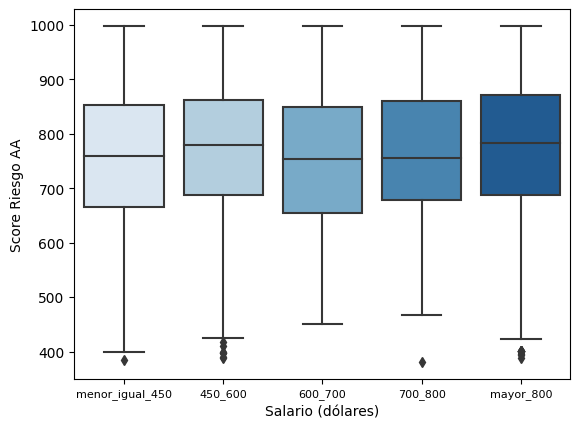

In [211]:
sns.boxplot(x='salario_iess_analisis',
            y='score_riesgo_AA',
            data=salario_iess_df,
            order=['menor_igual_450', '450_600', '600_700', '700_800', 'mayor_800'],
            palette="Blues"
           )

plt.xlabel("Salario (dólares)")
plt.ylabel("Score Riesgo AA")
plt.xticks(fontsize=8)

In [98]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_scheffe(salario_iess_df, val_col='score_riesgo_AA', group_col='salario_iess_analisis')

,mayor_800,450_600,700_800,menor_igual_450,600_700
mayor_800,1.00000,0.96102,0.70888,0.00448,0.02295
450_600,0.96102,1.00000,0.90195,0.13907,0.12087
700_800,0.70888,0.90195,1.00000,0.99527,0.89560
menor_igual_450,0.00448,0.13907,0.99527,1.00000,0.92793
600_700,0.02295,0.12087,0.89560,0.92793,1.00000


In [99]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_dunn(salario_iess_df, val_col='score_riesgo_AA', group_col='salario_iess_analisis')

,450_600,600_700,700_800,mayor_800,menor_igual_450
450_600,1.00000,0.00481,0.19353,0.34650,0.00583
600_700,0.00481,1.00000,0.37152,0.00033,0.33163
700_800,0.19353,0.37152,1.00000,0.06722,0.80895
mayor_800,0.34650,0.00033,0.06722,1.00000,0.00003
menor_igual_450,0.00583,0.33163,0.80895,0.00003,1.00000


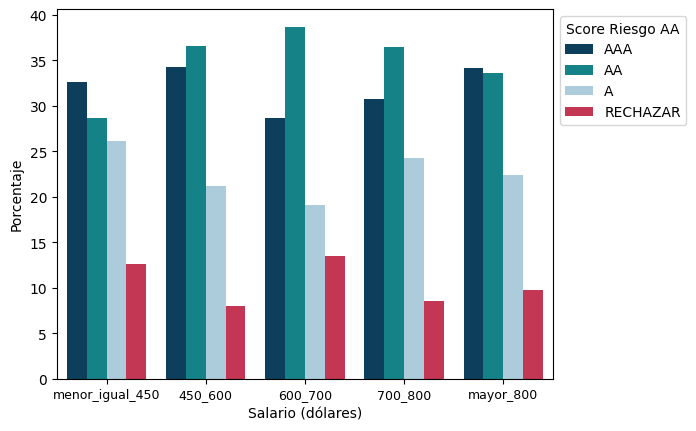

In [257]:
df_plt = salario_iess_df.query("calificacion_riesgo_AA != 'ANALISIS'")
df_plt = df_plt.groupby(['salario_iess_analisis', 'calificacion_riesgo_AA']).size()
df_plt = df_plt.reset_index()
df_plt = df_plt.rename(columns={0: "count"})
df_plt["percentage"] = df_plt["count"]*100/df_plt.groupby(['salario_iess_analisis'])['count'].transform('sum')

sns.barplot(x="salario_iess_analisis",
            y="percentage",
            hue="calificacion_riesgo_AA",
            order=['menor_igual_450', '450_600', '600_700', '700_800', 'mayor_800'],
            data=df_plt,
            palette=paleta,
            hue_order = h_order
           )

plt.xlabel("Salario (dólares)")
plt.ylabel("Porcentaje")
plt.legend(title="Score Riesgo AA", loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(fontsize=9)

plt.show()

## indep formal

### edad

In [258]:
edad_df = (dataf
 .filter("flag_dependencia = 'independiente_formal'")
 .filter("score_riesgo_AA > 220") # HEEEEERE
 .withColumn("edad_analisis",
             F.when(F.col("edad") <= 21, "menor_igual_21")
             .when((F.col("edad") > 21) & (F.col("edad") <=  23), "21_23")
             .when((F.col("edad") > 23) & (F.col("edad") <=  25), "23_25")
             .when((F.col("edad") > 25) & (F.col("edad") <=  60), "25_60")
             .when((F.col("edad") > 60) & (F.col("edad") <=  65), "60_65")             
             .otherwise("mayor_65")
            )
 .toPandas()
)

edad_df["edad_analisis"].value_counts()

25_60             6469
60_65              515
23_25              188
21_23              137
mayor_65           125
menor_igual_21      46
Name: edad_analisis, dtype: int64

In [86]:
performance1 = edad_df.query("edad_analisis == 'menor_igual_21'")["score_riesgo_AA"]
performance2 = edad_df.query("edad_analisis == '21_23'")["score_riesgo_AA"]
performance3 = edad_df.query("edad_analisis == '23_25'")["score_riesgo_AA"]
performance4 = edad_df.query("edad_analisis == '25_60'")["score_riesgo_AA"]
performance5 = edad_df.query("edad_analisis == '60_65'")["score_riesgo_AA"]
performance6 = edad_df.query("edad_analisis == 'mayor_65'")["score_riesgo_AA"]

print(f_oneway(performance1, performance2, performance3, performance4, performance5, performance6))
print(kruskal(performance1, performance2, performance3, performance4, performance5, performance6))

F_onewayResult(statistic=33.65414535451171, pvalue=4.197547521841135e-34)
KruskalResult(statistic=218.57170469382854, pvalue=3.005482694682543e-45)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'menor_igual_21'),
  Text(1, 0, '21_23'),
  Text(2, 0, '23_25'),
  Text(3, 0, '25_60'),
  Text(4, 0, '60_65'),
  Text(5, 0, 'mayor_65')])

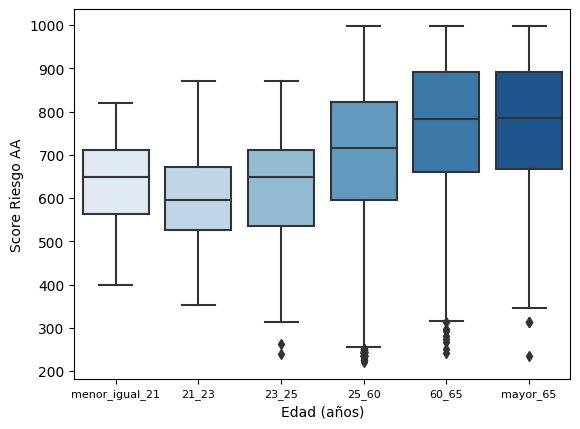

In [214]:
sns.boxplot(x='edad_analisis',
            y='score_riesgo_AA',
            data=edad_df,
            order=['menor_igual_21', '21_23', '23_25', '25_60', '60_65', 'mayor_65'],
            palette="Blues"
           )

plt.xlabel("Edad (años)")
plt.ylabel("Score Riesgo AA")
plt.xticks(fontsize=8)

In [215]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_scheffe(edad_df, val_col='score_riesgo_AA', group_col='edad_analisis')

,25_60,60_65,mayor_65,21_23,23_25,menor_igual_21
25_60,1.00000,0.00000,0.00173,0.00000,0.00000,0.47528
60_65,0.00000,1.00000,0.99920,0.00000,0.00000,0.00209
mayor_65,0.00173,0.99920,1.00000,0.00000,0.00000,0.00449
21_23,0.00000,0.00000,0.00000,1.00000,0.98397,0.86493
23_25,0.00000,0.00000,0.00000,0.98397,1.00000,0.98090
menor_igual_21,0.47528,0.00209,0.00449,0.86493,0.98090,1.00000


In [216]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_dunn(edad_df, val_col='score_riesgo_AA', group_col='edad_analisis')

,21_23,23_25,25_60,60_65,mayor_65,menor_igual_21
21_23,1.00000,0.28547,0.00000,0.00000,0.00000,0.17654
23_25,0.28547,1.00000,0.00000,0.00000,0.00000,0.50244
25_60,0.00000,0.00000,1.00000,0.00000,0.00000,0.00313
60_65,0.00000,0.00000,0.00000,1.00000,0.59394,0.00000
mayor_65,0.00000,0.00000,0.00000,0.59394,1.00000,0.00000
menor_igual_21,0.17654,0.50244,0.00313,0.00000,0.00000,1.00000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'menor_igual_21'),
  Text(1, 0, '21_23'),
  Text(2, 0, '23_25'),
  Text(3, 0, '25_60'),
  Text(4, 0, '60_65'),
  Text(5, 0, 'mayor_65')])

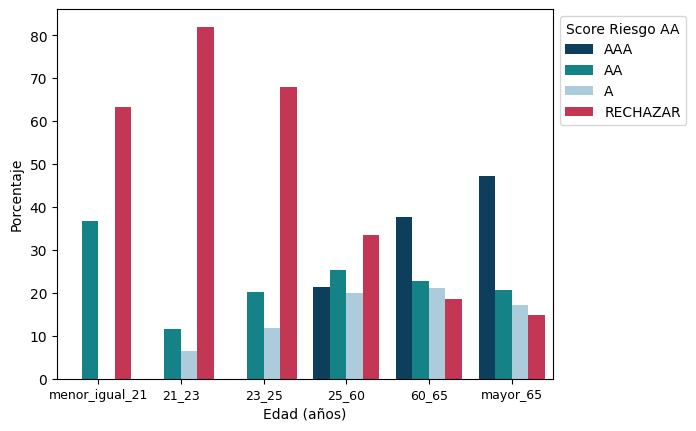

In [259]:
df_plt = edad_df.query("calificacion_riesgo_AA != 'ANALISIS'")
df_plt = df_plt.groupby(['edad_analisis', 'calificacion_riesgo_AA']).size()
df_plt = df_plt.reset_index()
df_plt = df_plt.rename(columns={0: "count"})
df_plt["percentage"] = df_plt["count"]*100/df_plt.groupby(['edad_analisis'])['count'].transform('sum')

sns.barplot(x="edad_analisis",
            y="percentage",
            hue="calificacion_riesgo_AA",
            order=['menor_igual_21', '21_23', '23_25', '25_60', '60_65', 'mayor_65'],
            data=df_plt,
            palette=paleta,
            hue_order = h_order
           )

plt.xlabel("Edad (años)")
plt.ylabel("Porcentaje")
plt.legend(title="Score Riesgo AA", loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(fontsize=9)

# plt.show()

### antiguedad_ruc

In [218]:
antiguedad_ruc_df = (dataf
                     .filter("flag_dependencia = 'independiente_formal'")
 
                     .withColumn("antiguedad_ruc_analisis",
                                 F.when(F.col("antiguedad_ruc") <= 12, "menor_igual_12")
                                 .when((F.col("antiguedad_ruc") > 12) & (F.col("antiguedad_ruc") <=  14), "12_14")             
                                 .when((F.col("antiguedad_ruc") > 14) & (F.col("antiguedad_ruc") <=  16), "14_16")
                                 .when((F.col("antiguedad_ruc") > 16) & (F.col("antiguedad_ruc") <=  18), "16_18")             
                                 .otherwise("mayor_18")
                                )
                     .toPandas()
                    )

antiguedad_ruc_df["antiguedad_ruc_analisis"].value_counts()

mayor_18          5483
menor_igual_12     902
12_14              422
14_16              363
16_18              339
Name: antiguedad_ruc_analisis, dtype: int64

In [58]:
performance0 = antiguedad_ruc_df.query("antiguedad_ruc_analisis == 'menor_igual_12'")["score_riesgo_AA"]
performance1 = antiguedad_ruc_df.query("antiguedad_ruc_analisis == '12_14'")["score_riesgo_AA"]
performance2 = antiguedad_ruc_df.query("antiguedad_ruc_analisis == '14_16'")["score_riesgo_AA"]
performance3 = antiguedad_ruc_df.query("antiguedad_ruc_analisis == '16_18'")["score_riesgo_AA"]
performance4 = antiguedad_ruc_df.query("antiguedad_ruc_analisis == 'mayor_18'")["score_riesgo_AA"]

print(f_oneway(performance0, performance1, performance2, performance3, performance4))
print(kruskal(performance0, performance1, performance2, performance3, performance4))

F_onewayResult(statistic=47.552409286214115, pvalue=1.5250538123588356e-39)
KruskalResult(statistic=217.58562526059112, pvalue=6.200914093523841e-46)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'menor_igual_12'),
  Text(1, 0, '12_14'),
  Text(2, 0, '14_16'),
  Text(3, 0, '16_18'),
  Text(4, 0, 'mayor_18')])

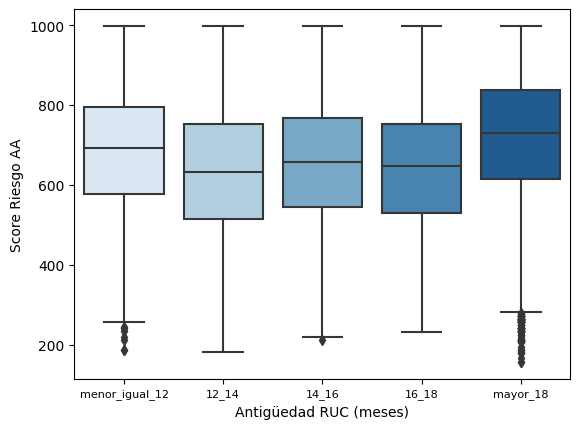

In [219]:
sns.boxplot(x='antiguedad_ruc_analisis',
            y='score_riesgo_AA',
            data=antiguedad_ruc_df,
            order=['menor_igual_12', '12_14', '14_16', '16_18', 'mayor_18'],
            palette="Blues"
           )

plt.xlabel("Antigüedad RUC (meses)")
plt.ylabel("Score Riesgo AA")
plt.xticks(fontsize=8)

In [220]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_scheffe(antiguedad_ruc_df, val_col='score_riesgo_AA', group_col='antiguedad_ruc_analisis')

,mayor_18,menor_igual_12,14_16,16_18,12_14
mayor_18,1.00000,0.00000,0.00000,0.00000,0.00000
menor_igual_12,0.00000,1.00000,0.15776,0.00482,0.00042
14_16,0.00000,0.15776,1.00000,0.85936,0.69687
16_18,0.00000,0.00482,0.85936,1.00000,0.99932
12_14,0.00000,0.00042,0.69687,0.99932,1.00000


In [221]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_dunn(antiguedad_ruc_df, val_col='score_riesgo_AA', group_col='antiguedad_ruc_analisis')

,12_14,14_16,16_18,mayor_18,menor_igual_12
12_14,1.00000,0.13838,0.76344,0.00000,0.00000
14_16,0.13838,1.00000,0.26535,0.00000,0.00838
16_18,0.76344,0.26535,1.00000,0.00000,0.00010
mayor_18,0.00000,0.00000,0.00000,1.00000,0.00000
menor_igual_12,0.00000,0.00838,0.00010,0.00000,1.00000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'menor_igual_12'),
  Text(1, 0, '12_14'),
  Text(2, 0, '14_16'),
  Text(3, 0, '16_18'),
  Text(4, 0, 'mayor_18')])

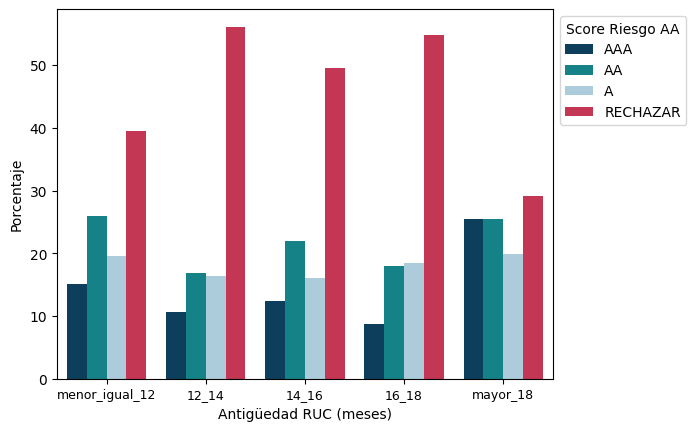

In [260]:
df_plt = antiguedad_ruc_df.query("calificacion_riesgo_AA != 'ANALISIS'")
df_plt = df_plt.groupby(['antiguedad_ruc_analisis', 'calificacion_riesgo_AA']).size()
df_plt = df_plt.reset_index()
df_plt = df_plt.rename(columns={0: "count"})
df_plt["percentage"] = df_plt["count"]*100/df_plt.groupby(['antiguedad_ruc_analisis'])['count'].transform('sum')

sns.barplot(x="antiguedad_ruc_analisis",
            y="percentage",
            hue="calificacion_riesgo_AA",
            order=['menor_igual_12', '12_14', '14_16', '16_18', 'mayor_18'],
            data=df_plt,
            palette=paleta,
            hue_order = h_order
           )

plt.xlabel("Antigüedad RUC (meses)")
plt.ylabel("Porcentaje")
plt.legend(title="Score Riesgo AA", loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(fontsize=9)

# plt.show()

## indep informal

### edad

In [261]:
edad_df = (dataf
 .filter("flag_dependencia = 'independiente_informal'")
 .withColumn("edad_analisis",
             F.when(F.col("edad") <= 21, "menor_igual_21")
             .when((F.col("edad") > 21) & (F.col("edad") <=  23), "21_23")
             .when((F.col("edad") > 23) & (F.col("edad") <=  25), "23_25")
             .when((F.col("edad") > 25) & (F.col("edad") <=  60), "25_60")
             .when((F.col("edad") > 60) & (F.col("edad") <=  65), "60_65")             
             .otherwise("mayor_65")
            )
 .toPandas()
)

edad_df["edad_analisis"].value_counts()

25_60             5367
60_65              516
23_25              320
21_23              182
mayor_65           154
menor_igual_21      88
Name: edad_analisis, dtype: int64

In [228]:
performance1 = edad_df.query("edad_analisis == 'menor_igual_21'")["score_riesgo_AA"]
performance2 = edad_df.query("edad_analisis == '21_23'")["score_riesgo_AA"]
performance3 = edad_df.query("edad_analisis == '23_25'")["score_riesgo_AA"]
performance4 = edad_df.query("edad_analisis == '25_60'")["score_riesgo_AA"]
performance5 = edad_df.query("edad_analisis == '60_65'")["score_riesgo_AA"]
performance6 = edad_df.query("edad_analisis == 'mayor_65'")["score_riesgo_AA"]

print(f_oneway(performance1, performance2, performance3, performance4, performance5, performance6))
print(kruskal(performance1, performance2, performance3, performance4, performance5, performance6))

F_onewayResult(statistic=60.869835533785555, pvalue=3.2395836934583275e-62)
KruskalResult(statistic=352.58268761880714, pvalue=4.864547471917958e-74)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'menor_igual_21'),
  Text(1, 0, '21_23'),
  Text(2, 0, '23_25'),
  Text(3, 0, '25_60'),
  Text(4, 0, '60_65'),
  Text(5, 0, 'mayor_65')])

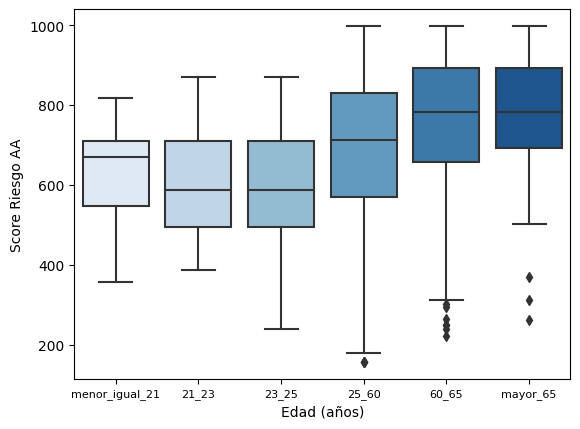

In [230]:
sns.boxplot(x='edad_analisis',
            y='score_riesgo_AA',
            data=edad_df,
            order=['menor_igual_21', '21_23', '23_25', '25_60', '60_65', 'mayor_65'],
            palette="Blues"
           )

plt.xlabel("Edad (años)")
plt.ylabel("Score Riesgo AA")
plt.xticks(fontsize=8)

In [231]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_scheffe(edad_df, val_col='score_riesgo_AA', group_col='edad_analisis')

,25_60,mayor_65,23_25,60_65,menor_igual_21,21_23
25_60,1.00000,0.00001,0.00000,0.00000,0.06822,0.00000
mayor_65,0.00001,1.00000,0.00000,0.99449,0.00000,0.00000
23_25,0.00000,0.00000,1.00000,0.00000,0.36162,0.99418
60_65,0.00000,0.99449,0.00000,1.00000,0.00000,0.00000
menor_igual_21,0.06822,0.00000,0.36162,0.00000,1.00000,0.72014
21_23,0.00000,0.00000,0.99418,0.00000,0.72014,1.00000


In [94]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sp.posthoc_dunn(edad_df, val_col='score_riesgo_AA', group_col='edad_analisis')

,21_23,23_25,25_60,60_65,mayor_65,menor_igual_21
21_23,1.00000,0.72702,0.00000,0.00000,0.00000,0.08274
23_25,0.72702,1.00000,0.00000,0.00000,0.00000,0.03229
25_60,0.00000,0.00000,1.00000,0.00000,0.00000,0.00008
60_65,0.00000,0.00000,0.00000,1.00000,0.57945,0.00000
mayor_65,0.00000,0.00000,0.00000,0.57945,1.00000,0.00000
menor_igual_21,0.08274,0.03229,0.00008,0.00000,0.00000,1.00000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'menor_igual_21'),
  Text(1, 0, '21_23'),
  Text(2, 0, '23_25'),
  Text(3, 0, '25_60'),
  Text(4, 0, '60_65'),
  Text(5, 0, 'mayor_65')])

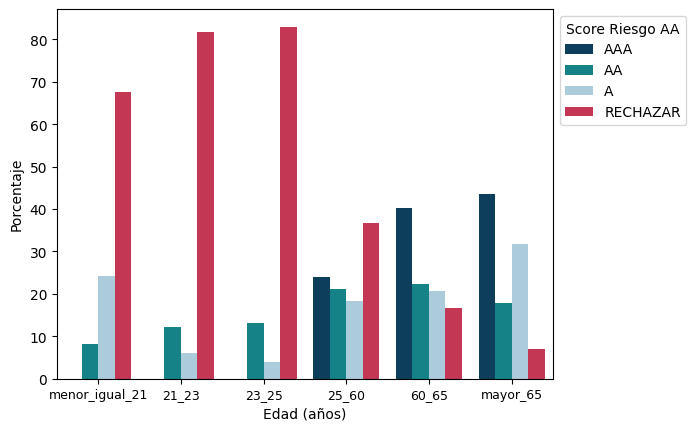

In [262]:
df_plt = edad_df.query("calificacion_riesgo_AA != 'ANALISIS'")
df_plt = df_plt.groupby(['edad_analisis', 'calificacion_riesgo_AA']).size()
df_plt = df_plt.reset_index()
df_plt = df_plt.rename(columns={0: "count"})
df_plt["percentage"] = df_plt["count"]*100/df_plt.groupby(['edad_analisis'])['count'].transform('sum')

sns.barplot(x="edad_analisis",
            y="percentage",
            hue="calificacion_riesgo_AA",
            order=['menor_igual_21', '21_23', '23_25', '25_60', '60_65', 'mayor_65'],
            data=df_plt,
            palette=paleta,
            hue_order = h_order
           )

plt.xlabel("Edad (años)")
plt.ylabel("Porcentaje")
plt.legend(title="Score Riesgo AA", loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(fontsize=9)

# plt.show()

In [96]:
(dataf
 .limit(5)
 .toPandas()
)

,codigo_cliente,yyyy_snapshot,mm_snapshot,score_riesgo_AA,calificacion_riesgo_AA,fecha_nacimiento_rc,salario_iess,fecha_ing_afi_iess,fecsalafi,fecha_inicio_actividades,fecha_suspension_definitiva,fecha_reinicio_actividades,fecha,flag_dependencia,target,estabilidad_laboral,edad,antiguedad_ruc,gasto_hogar,score_v4,decision_final,ingreso,indicador_covid,des_ciudadania
0,AA656052,2023,04,847.0,AA,1980-07-26,986.0,2014-11-01,None,None,None,None,2023-04-30,dependiente,0,101.935484,42.760753,NaN,NaN,NaN,None,2466.989990,None,CIUDADANO
1,AE510385,2022,12,968.0,AAA,1987-11-27,532.0,2011-01-03,None,2014-09-24,None,2019-09-30,2022-12-31,dependiente,0,143.903226,35.094086,39.000000,NaN,NaN,None,2733.179932,None,CIUDADANO
2,AA220359,2023,07,505.0,RECHAZAR,1983-01-04,NaN,None,None,2006-11-24,2010-07-13,None,2023-07-31,independiente_informal,1,NaN,40.572581,200.225806,NaN,NaN,None,1783.160034,None,DISCAPACIDAD AUDITIVA MAYOR DE EDAD
3,AB001114,2023,07,450.0,RECHAZAR,1994-08-31,NaN,None,None,2018-10-12,None,None,2023-07-31,independiente_formal,1,NaN,28.916667,57.612903,NaN,NaN,None,1304.869995,None,CIUDADANO
4,AA499584,2022,08,784.0,A,1956-03-07,NaN,None,None,2006-06-21,2021-01-26,None,2022-08-31,independiente_informal,0,NaN,66.481183,194.322581,NaN,NaN,None,2119.290039,None,CIUDADANO


# arboles de clasificacion

In [107]:
from optbinning import OptimalBinning, MulticlassOptimalBinning

In [103]:
df_dep = (df_
          .filter("flag_dependencia = 'dependiente'")
         )

df_indep_formal = (df_
                   .filter("flag_dependencia = 'independiente_formal'")
                  )

df_indep_informal = (df_
                     .filter("flag_dependencia = 'independiente_informal'")
                    )

In [135]:
calif = "AAA"
df_calif = (df_dep
            .withColumn(f"calif_{calif}",
                        F.when(F.col("calificacion_riesgo_AA") == calif, 1).otherwise(0)
                       )
           )

,codigo_cliente,yyyy_snapshot,mm_snapshot,score_riesgo_AA,calificacion_riesgo_AA,fecha_nacimiento_rc,salario_iess,fecha_ing_afi_iess,fecsalafi,fecha_inicio_actividades,fecha_suspension_definitiva,fecha_reinicio_actividades,fecha,flag_dependencia,target,estabilidad_laboral,edad,antiguedad_ruc,calif_AAA
0,AA559336,2023,06,809.0,AA,1973-11-01,1000.0,2015-08-01,None,1999-01-20,None,None,2023-06-30,dependiente,0,94.935484,49.661290,293.322581,0
1,AB310647,2022,12,860.0,AA,1971-05-23,986.0,2016-09-01,None,2009-02-04,None,2020-03-13,2022-12-31,dependiente,0,75.967742,51.604839,33.580645,0
2,AB885134,2023,04,998.0,AAA,1980-10-21,2641.0,2020-07-01,None,2008-06-11,2022-11-17,2022-03-19,2023-04-30,dependiente,0,33.935484,42.524194,13.354839,1
3,AB940946,2023,04,862.0,AA,1981-12-03,750.0,2019-11-05,None,2008-07-29,2020-01-16,2019-09-04,2023-04-30,dependiente,0,41.806452,41.405914,43.838710,0
4,AB937052,2023,04,817.0,AA,1970-07-14,817.0,2020-07-01,None,None,None,None,2023-04-30,dependiente,0,33.935484,52.793011,NaN,0


## dep

### edad

In [131]:
dep_vars = "edad"

x = df_dep.toPandas()[dep_vars]
y = df_dep.toPandas()["target"]

optb = OptimalBinning() # name="target", dtype="numerical", solver="cp"
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
edad


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 28.86)",324,0.079783,253,71,0.219136,-0.816791,0.072251,0.008788
1,"[28.86, 30.70)",243,0.059837,203,40,0.164609,-0.463174,0.015331,0.001899
2,"[30.70, 34.63)",562,0.138390,487,75,0.133452,-0.216724,0.007069,0.000882
3,"[34.63, 39.13)",673,0.165723,590,83,0.123328,-0.126219,0.002773,0.000346
4,"[39.13, 44.85)",726,0.178774,654,72,0.099174,0.118941,0.002414,0.000302
5,"[44.85, 46.48)",205,0.050480,196,9,0.043902,0.99339,0.033933,0.004075
6,"[46.48, 48.88)",255,0.062792,241,14,0.054902,0.758239,0.026882,0.003282
7,"[48.88, 59.92)",862,0.212263,795,67,0.077726,0.386149,0.027218,0.003381
8,"[59.92, inf)",211,0.051958,194,17,0.080569,0.347144,0.005467,0.000680
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [126]:
dep_vars = "edad"

x = df_dep.toPandas()[dep_vars]
y = df_dep.toPandas()["calificacion_riesgo_AA"]

optb = MulticlassOptimalBinning()
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
edad


,Bin,Count,Count (%),Event_A,Event_AA,Event_AAA,Event_RECHAZAR,Event_rate_A,Event_rate_AA,Event_rate_AAA,Event_rate_RECHAZAR
0,"(-inf, 27.59)",204,0.050234,47,76,33,48,0.230392,0.372549,0.161765,0.235294
1,"[27.59, 39.69)",1662,0.409259,361,608,467,226,0.217208,0.365824,0.280987,0.135981
2,"[39.69, 45.06)",679,0.167200,150,222,239,68,0.220913,0.326951,0.351988,0.100147
3,"[45.06, inf)",1516,0.373307,358,446,606,106,0.236148,0.294195,0.399736,0.069921
4,Special,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000
5,Missing,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Totals,,4061,1.000000,916,1352,1345,448,0.225560,0.332923,0.331199,0.110318


### salario

In [130]:
dep_vars = "salario_iess"

x = df_dep.toPandas()[dep_vars]
y = df_dep.toPandas()["target"]

optb = OptimalBinning() # name="target", dtype="numerical", solver="cp"
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
salario_iess


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 449.64)",734,0.180744,628,106,0.144414,-0.308399,0.019365,0.002411
1,"[449.64, 459.86)",298,0.073381,275,23,0.077181,0.393776,0.009756,0.001212
2,"[459.86, 479.76)",205,0.050480,199,6,0.029268,1.414045,0.058946,0.006810
3,"[479.76, inf)",2780,0.684560,2498,282,0.101439,0.093838,0.005811,0.000726
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,44,0.010835,13,31,0.704545,-2.956538,0.193944,0.018065
Totals,,4061,1.000000,3613,448,0.110318,,0.287821,0.029223


In [127]:
dep_vars = "salario_iess"

x = df_dep.toPandas()[dep_vars]
y = df_dep.toPandas()["calificacion_riesgo_AA"]

optb = MulticlassOptimalBinning()
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
salario_iess


,Bin,Count,Count (%),Event_A,Event_AA,Event_AAA,Event_RECHAZAR,Event_rate_A,Event_rate_AA,Event_rate_AAA,Event_rate_RECHAZAR
0,"(-inf, 451.84)",876,0.215710,229,246,282,119,0.261416,0.280822,0.321918,0.135845
1,"[451.84, inf)",3141,0.773455,681,1101,1061,298,0.216810,0.350525,0.337791,0.094874
2,Special,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,Missing,44,0.010835,6,5,2,31,0.136364,0.113636,0.045455,0.704545
Totals,,4061,1.000000,916,1352,1345,448,0.225560,0.332923,0.331199,0.110318


### estabilidad laboral

In [141]:
calif = "AAA"
df_calif = (df_dep
            .withColumn(f"calif_{calif}",
                        F.when(F.col("calificacion_riesgo_AA") == calif, 1).otherwise(0)
                       )
           )

dep_vars = "estabilidad_laboral"

x = df_calif.toPandas()[dep_vars]
y = df_calif.toPandas()[f"calif_{calif}"]

optb = OptimalBinning() # name="target", dtype="numerical", solver="cp"
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
estabilidad_laboral


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11.26)",518,0.127555,383,135,0.260618,0.339994,0.013819,1.719087e-03
1,"[11.26, 18.24)",281,0.069195,225,56,0.199288,0.687983,0.028350,3.475414e-03
2,"[18.24, 25.90)",276,0.067964,205,71,0.257246,0.357564,0.008113,1.008796e-03
3,"[25.90, 72.03)",1349,0.332184,901,448,0.332098,-0.004054,0.000005,6.829511e-07
4,"[72.03, 105.50)",703,0.173110,448,255,0.362731,-0.139237,0.003431,4.285480e-04
5,"[105.50, 167.16)",698,0.171879,415,283,0.405444,-0.319935,0.018432,2.294180e-03
6,"[167.16, inf)",236,0.058114,139,97,0.411017,-0.343003,0.007183,8.934678e-04
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,4061,1.000000,2716,1345,0.331199,,0.079333,9.820176e-03


In [147]:
calif = "AAA"
df_calif = (df_dep
            .filter(F.col("calificacion_riesgo_AA").isin("RECHAZAR", calif))
            .withColumn(f"calif_{calif}",
                        F.when(F.col("calificacion_riesgo_AA") == "RECHAZAR", 1).otherwise(0)
                       )
           )

dep_vars = "estabilidad_laboral"

x = df_calif.toPandas()[dep_vars]
y = df_calif.toPandas()[f"calif_{calif}"]

optb = OptimalBinning() # name="target", dtype="numerical", solver="cp"
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
estabilidad_laboral


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3.95)",92,0.051311,50,42,0.456522,-0.925003,0.052332,0.006318
1,"[3.95, 17.95)",228,0.127161,139,89,0.390351,-0.653518,0.062290,0.007651
2,"[17.95, 25.95)",122,0.068042,79,43,0.352459,-0.491108,0.018292,0.002264
3,"[25.95, 80.19)",665,0.370887,512,153,0.230075,0.108531,0.004249,0.000531
4,"[80.19, 107.73)",262,0.146124,206,56,0.213740,0.203168,0.005721,0.000714
5,"[107.73, 115.19)",91,0.050753,83,8,0.087912,1.240043,0.054379,0.006393
6,"[115.19, inf)",333,0.185722,276,57,0.171171,0.477994,0.037270,0.004615
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1793,1.000000,1345,448,0.249861,,0.234534,0.028485


In [146]:
calif = "AA"
df_calif = (df_dep
            .filter(F.col("calificacion_riesgo_AA").isin("RECHAZAR", calif))
            .withColumn(f"calif_{calif}",
                        F.when(F.col("calificacion_riesgo_AA") == "RECHAZAR", 1).otherwise(0)
                       )
           )

dep_vars = "estabilidad_laboral"

x = df_calif.toPandas()[dep_vars]
y = df_calif.toPandas()[f"calif_{calif}"]

optb = OptimalBinning() # name="target", dtype="numerical", solver="cp"
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
estabilidad_laboral


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3.18)",101,0.056111,61,40,0.396040,-0.682553,0.030147,0.003697
1,"[3.18, 15.95)",266,0.147778,189,77,0.289474,-0.206605,0.006628,0.000827
2,"[15.95, 23.31)",164,0.091111,118,46,0.280488,-0.162504,0.002503,0.000312
3,"[23.31, 89.95)",774,0.430000,592,182,0.235142,0.074953,0.002370,0.000296
4,"[89.95, 129.16)",276,0.153333,212,64,0.231884,0.093156,0.001299,0.000162
5,"[129.16, 150.45)",95,0.052778,75,20,0.210526,0.217209,0.002352,0.000293
6,"[150.45, inf)",124,0.068889,105,19,0.153226,0.604974,0.021327,0.002626
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1800,1.000000,1352,448,0.248889,,0.066626,0.008214


In [145]:
calif = "A"
df_calif = (df_dep
            .filter(F.col("calificacion_riesgo_AA").isin("RECHAZAR", calif))
            .withColumn(f"calif_{calif}",
                        F.when(F.col("calificacion_riesgo_AA") == "RECHAZAR", 1).otherwise(0)
                       )
           )

dep_vars = "estabilidad_laboral"

x = df_calif.toPandas()[dep_vars]
y = df_calif.toPandas()[f"calif_{calif}"]

optb = OptimalBinning() # name="target", dtype="numerical", solver="cp"
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
estabilidad_laboral


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.95)",139,0.101906,77,62,0.446043,-0.498552,0.027087,0.003351
1,"[6.95, 25.95)",274,0.200880,162,112,0.408759,-0.346126,0.025317,0.003149
2,"[25.95, 80.29)",493,0.361437,340,153,0.310345,0.083285,0.002470,0.000309
3,"[80.29, 150.24)",359,0.263196,257,102,0.284123,0.20888,0.011047,0.001378
4,"[150.24, inf)",99,0.072581,80,19,0.191919,0.722365,0.032453,0.003971
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1364,1.000000,916,448,0.328446,,0.098375,0.012158


In [133]:
dep_vars = "estabilidad_laboral"

x = df_dep.toPandas()[dep_vars]
y = df_dep.toPandas()["target"]

optb = OptimalBinning()# name="target", dtype="numerical", solver="cp"
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
estabilidad_laboral


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 7.02)",348,0.085693,283,65,0.186782,-0.616441,0.041154,0.005064
1,"[7.02, 17.77)",427,0.105147,362,65,0.152225,-0.370244,0.016622,0.002066
2,"[17.77, 25.95)",314,0.077321,270,44,0.140127,-0.273268,0.006417,0.000800
3,"[25.95, 80.19)",1510,0.371830,1357,153,0.101325,0.095093,0.003240,0.000405
4,"[80.19, 103.95)",502,0.123615,454,48,0.095618,0.159396,0.002951,0.000369
5,"[103.95, 138.19)",496,0.122137,452,44,0.088710,0.241992,0.006507,0.000811
6,"[138.19, inf)",464,0.114258,435,29,0.062500,0.62055,0.034544,0.004250
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,4061,1.000000,3613,448,0.110318,,0.111436,0.013765


In [134]:
dep_vars = "estabilidad_laboral"

x = df_dep.toPandas()[dep_vars]
y = df_dep.toPandas()["calificacion_riesgo_AA"]

optb = MulticlassOptimalBinning()
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
estabilidad_laboral


,Bin,Count,Count (%),Event_A,Event_AA,Event_AAA,Event_RECHAZAR,Event_rate_A,Event_rate_AA,Event_rate_AAA,Event_rate_RECHAZAR
0,"(-inf, 26.32)",1102,0.271362,241,416,271,174,0.218693,0.377495,0.245917,0.157895
1,"[26.32, 50.68)",769,0.189362,174,260,259,76,0.226268,0.338101,0.336801,0.098830
2,"[50.68, 149.95)",1860,0.458015,421,570,691,178,0.226344,0.306452,0.371505,0.095699
3,"[149.95, inf)",330,0.081261,80,106,124,20,0.242424,0.321212,0.375758,0.060606
4,Special,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000
5,Missing,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Totals,,4061,1.000000,916,1352,1345,448,0.225560,0.332923,0.331199,0.110318


## indep_formal

### edad

In [104]:
indep_formal_vars = "edad"

x = df_indep_formal.toPandas()[indep_formal_vars]
y = df_indep_formal.toPandas()["target"]

optb = OptimalBinning(name="target", dtype="numerical", solver="cp")
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(indep_formal_vars)
binning_table.build()

OPTIMAL
edad


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 26.32)",243,0.050394,93,150,0.617284,-1.149177,0.072195,8.558498e-03
1,"[26.32, 44.00)",2348,0.486935,1460,888,0.378194,-0.173921,0.015116,1.887153e-03
2,"[44.00, 50.00)",811,0.168187,536,275,0.339088,-0.003778,0.000002,3.002501e-07
3,"[50.00, 52.38)",284,0.058897,200,84,0.295775,0.19636,0.002194,2.738286e-04
4,"[52.38, 54.92)",247,0.051224,179,68,0.275304,0.296737,0.004274,5.322886e-04
5,"[54.92, 59.07)",355,0.073621,279,76,0.214085,0.629337,0.025700,3.160484e-03
6,"[59.07, 62.34)",247,0.051224,203,44,0.178138,0.857875,0.031432,3.812759e-03
7,"[62.34, inf)",287,0.059519,241,46,0.160279,0.985015,0.046612,5.601843e-03
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00


### antiguedad ruc

In [148]:
calif = "AAA"
df_calif = (df_indep_formal
            .filter(F.col("calificacion_riesgo_AA").isin("RECHAZAR", calif))
            .withColumn(f"calif_{calif}",
                        F.when(F.col("calificacion_riesgo_AA") == "RECHAZAR", 1).otherwise(0)
                       )
           )

dep_vars = "antiguedad_ruc"

x = df_calif.toPandas()[dep_vars]
y = df_calif.toPandas()[f"calif_{calif}"]

optb = OptimalBinning() # name="target", dtype="numerical", solver="cp"
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
antiguedad_ruc


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 10.08)",155,0.057429,56,99,0.638710,-0.146363,0.001210,0.000151
1,"[10.08, 12.11)",156,0.057799,29,127,0.814103,-1.053486,0.053425,0.006386
2,"[12.11, 16.05)",305,0.113005,55,250,0.819672,-1.090722,0.111016,0.013228
3,"[16.05, 18.73)",138,0.051130,17,121,0.876812,-1.539172,0.089688,0.010221
4,"[18.73, 26.37)",152,0.056317,36,116,0.763158,-0.746666,0.027936,0.003413
5,"[26.37, 38.21)",218,0.080771,67,151,0.692661,-0.389182,0.011616,0.001443
6,"[38.21, 70.19)",452,0.167469,171,281,0.621681,-0.073286,0.000892,0.000112
7,"[70.19, 138.68)",475,0.175991,251,224,0.471579,0.537212,0.052475,0.006482
8,"[138.68, 230.16)",352,0.130419,188,164,0.465909,0.559981,0.042266,0.005215
9,"[230.16, inf)",296,0.109670,198,98,0.331081,1.126705,0.141185,0.016770


In [149]:
calif = "AA"
df_calif = (df_indep_formal
            .filter(F.col("calificacion_riesgo_AA").isin("RECHAZAR", calif))
            .withColumn(f"calif_{calif}",
                        F.when(F.col("calificacion_riesgo_AA") == "RECHAZAR", 1).otherwise(0)
                       )
           )

dep_vars = "antiguedad_ruc"

x = df_calif.toPandas()[dep_vars]
y = df_calif.toPandas()[f"calif_{calif}"]

optb = OptimalBinning() # name="target", dtype="numerical", solver="cp"
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
antiguedad_ruc


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 21.18)",930,0.330138,293,637,0.684946,-0.45799,0.065726,0.008145
1,"[21.18, 29.85)",178,0.063188,61,117,0.657303,-0.332693,0.006754,0.000840
2,"[29.85, 37.26)",165,0.058573,63,102,0.618182,-0.163231,0.001537,0.000192
3,"[37.26, 46.76)",188,0.066738,84,104,0.553191,0.105033,0.000742,0.000093
4,"[46.76, 64.56)",306,0.108626,154,152,0.496732,0.331679,0.012157,0.001513
5,"[64.56, 88.19)",220,0.078097,113,107,0.486364,0.373166,0.011073,0.001376
6,"[88.19, 106.29)",144,0.051118,88,56,0.388889,0.770592,0.030719,0.003748
7,"[106.29, 174.16)",315,0.111821,155,160,0.507937,0.286858,0.009349,0.001165
8,"[174.16, inf)",371,0.131700,175,196,0.528302,0.205278,0.005621,0.000701
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [150]:
calif = "A"
df_calif = (df_indep_formal
            .filter(F.col("calificacion_riesgo_AA").isin("RECHAZAR", calif))
            .withColumn(f"calif_{calif}",
                        F.when(F.col("calificacion_riesgo_AA") == "RECHAZAR", 1).otherwise(0)
                       )
           )

dep_vars = "antiguedad_ruc"

x = df_calif.toPandas()[dep_vars]
y = df_calif.toPandas()[f"calif_{calif}"]

optb = OptimalBinning() # name="target", dtype="numerical", solver="cp"
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
antiguedad_ruc


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15.15)",593,0.230919,161,432,0.728499,-0.432756,0.040265,0.004994
1,"[15.15, 17.60)",204,0.079439,57,147,0.720588,-0.393116,0.011517,0.001430
2,"[17.60, 25.82)",185,0.072040,61,124,0.670270,-0.155142,0.001695,0.000212
3,"[25.82, 89.97)",861,0.335280,337,524,0.608595,0.112857,0.004332,0.000541
4,"[89.97, 111.50)",140,0.054517,77,63,0.450000,0.754936,0.032878,0.004015
5,"[111.50, inf)",585,0.227804,244,341,0.582906,0.219551,0.011270,0.001406
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,2568,1.000000,937,1631,0.635125,,0.101956,0.012598


In [105]:
indep_formal_vars = "antiguedad_ruc"

x = df_indep_formal.toPandas()[indep_formal_vars]
y = df_indep_formal.toPandas()["target"]

optb = OptimalBinning(name="target", dtype="numerical", solver="cp")
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(indep_formal_vars)
binning_table.build()

OPTIMAL
antiguedad_ruc


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 10.08)",329,0.068229,230,99,0.300912,0.171818,0.001955,0.000244
1,"[10.08, 12.63)",311,0.064496,145,166,0.533762,-0.806395,0.045430,0.005530
2,"[12.63, 14.63)",243,0.050394,99,144,0.592593,-1.045834,0.059889,0.007163
3,"[14.63, 17.76)",355,0.073621,177,178,0.501408,-0.676775,0.036320,0.004455
4,"[17.76, 29.97)",398,0.082538,229,169,0.424623,-0.367318,0.011700,0.001454
5,"[29.97, 37.24)",277,0.057445,177,100,0.361011,-0.100161,0.000585,0.000073
6,"[37.24, 72.11)",949,0.196806,648,301,0.317176,0.095639,0.001771,0.000221
7,"[72.11, 230.16)",1472,0.305268,1096,376,0.255435,0.398692,0.045025,0.005591
8,"[230.16, inf)",488,0.101203,390,98,0.200820,0.710038,0.044117,0.005402
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [151]:
dep_vars = "antiguedad_ruc"

x = df_indep_formal.toPandas()[dep_vars]
y = df_indep_formal.toPandas()["calificacion_riesgo_AA"]

optb = MulticlassOptimalBinning()
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars)
binning_table.build()

OPTIMAL
antiguedad_ruc


,Bin,Count,Count (%),Event_A,Event_AA,Event_AAA,Event_RECHAZAR,Event_rate_A,Event_rate_AA,Event_rate_AAA,Event_rate_RECHAZAR
0,"(-inf, 8.61)",265,0.054956,68,77,46,74,0.256604,0.290566,0.173585,0.279245
1,"[8.61, 38.19)",1676,0.347574,321,351,214,790,0.191527,0.209427,0.127685,0.471360
2,"[38.19, inf)",2881,0.597470,548,758,808,767,0.190212,0.263103,0.280458,0.266227
3,Special,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,Missing,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Totals,,4822,1.000000,937,1186,1068,1631,0.194318,0.245956,0.221485,0.338241


## indep_informal

In [106]:
indep_informal_formal_vars = "edad"

x = df_indep_informal.toPandas()[indep_informal_formal_vars]
y = df_indep_informal.toPandas()["target"]

optb = OptimalBinning(name="target", dtype="numerical", solver="cp")
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(indep_informal_formal_vars)
binning_table.build()

OPTIMAL
edad


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 27.80)",445,0.098713,115,330,0.741573,-1.571143,0.243904,0.027694
1,"[27.80, 34.10)",503,0.111579,292,211,0.419483,-0.192087,0.004206,0.000525
2,"[34.10, 40.10)",759,0.168367,445,314,0.413702,-0.168301,0.004861,0.000607
3,"[40.10, 45.31)",769,0.170586,475,294,0.382315,-0.037247,0.000238,0.000030
4,"[45.31, 47.19)",234,0.051908,159,75,0.320513,0.234434,0.002758,0.000344
5,"[47.19, 53.35)",691,0.153283,471,220,0.318379,0.244248,0.008828,0.001101
6,"[53.35, 58.23)",480,0.106477,340,140,0.291667,0.370321,0.013799,0.001715
7,"[58.23, 61.63)",273,0.060559,218,55,0.201465,0.860179,0.038308,0.004646
8,"[61.63, inf)",354,0.078527,309,45,0.127119,1.409696,0.116578,0.013474
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [160]:
cliente_vars = ["codigo_cliente", "flag_dependencia"]
dep_vars = ["edad_rc", "salario_iess", "estab_laboral_m_iess"]
indep_vars = ["edad_rc","estado_contribuyente_sri", "meses_actividad_sri", "tipo_formalidad_sri"]

demo_df = (fea_cliente_enriquecido_activo
           .select(cliente_vars + dep_vars + indep_vars)
           .distinct()
          )

In [163]:
(df
 .join(demo_df, "codigo_cliente")
 .filter(F.col("edad_rc").isNull())
 .limit(5)
 .toPandas()
)

,codigo_cliente,yyyy_snapshot,mm_snapshot,numeric_nulls,prop_numeric_nulls,marca_bancarizado,ingreso,score,decision_score,provincia,estado_civil,genero,titulo,nivel,relacion_laboral,actividad_economica,titulo_academico,b_cant_castigada_12,b_cant_castigada_3,b_cant_judicial_12,b_cant_judicial_3,b_cant_oc_ven_vig_12,b_cant_oc_ven_vig_3,b_cant_oc_vig_12,b_cant_oc_vig_3,b_cant_ocor_ven_vig_12,b_cant_ocor_ven_vig_3,b_cant_ocor_vig_12,b_cant_ocor_vig_3,b_cant_odif12_ven_vig_12,b_cant_odif12_ven_vig_3,b_cant_odif12_vig_12,b_cant_odif12_vig_3,b_cant_odif36_ven_vig_12,b_cant_odif36_ven_vig_3,b_cant_odif36_vig_12,b_cant_odif36_vig_3,b_cant_odif6_ven_vig_12,b_cant_odif6_ven_vig_3,b_cant_odif6_vig_12,b_cant_odif6_vig_3,b_cant_odifs_ven_vig_12,b_cant_odifs_ven_vig_3,b_cant_odifs_vig_12,b_cant_odifs_vig_3,b_cant_ootras_ven_vig_12,b_cant_ootras_ven_vig_3,b_cant_ootras_vig_12,b_cant_ootras_vig_3,b_cant_orot_ven_vig_12,b_cant_orot_ven_vig_3,b_cant_orot_vig_12,b_cant_orot_vig_3,b_cant_ov_ven_vig_12,b_cant_ov_ven_vig_3,b_cant_ov_vig_12,b_cant_ov_vig_3,b_cant_total_12,b_cant_total_3,b_cant_vencido_12,b_cant_vencido_1_12,b_cant_vencido_1_3,b_cant_vencido_2_12,b_cant_vencido_2_3,b_cant_vencido_36_12,b_cant_vencido_36_3,b_cant_vencido_3_12,b_cant_vencido_3_3,b_cant_x_vencer_12,b_cant_x_vencer_3,b_deuda_castigada_12,b_deuda_castigada_3,b_deuda_judicial_12,b_deuda_judicial_3,b_deuda_no_devenga_12,b_deuda_no_devenga_3,b_deuda_total_12,b_deuda_total_3,b_deuda_vencido_12,b_deuda_vencido_1_12,b_deuda_vencido_1_3,b_deuda_vencido_2_12,b_deuda_vencido_2_3,b_deuda_vencido_36_12,b_deuda_vencido_36_3,b_deuda_vencido_3_12,b_deuda_vencido_3_3,b_deuda_x_vencer_12,b_deuda_x_vencer_3,b_m_dven_oc_12,b_m_dven_oc_3,b_m_dven_ov_12,b_m_dven_ov_3,b_m_sal_oc_12,b_m_sal_oc_3,b_m_sal_ocor_ven_12,b_m_sal_ocor_ven_3,b_m_sal_ocor_vig_12,b_m_sal_ocor_vig_3,b_m_sal_odif12_12,b_m_sal_odif12_3,b_m_sal_odif12_ven_12,b_m_sal_odif12_ven_3,b_m_sal_odif36_12,b_m_sal_odif36_3,b_m_sal_odif36_ven_12,b_m_sal_odif36_ven_3,b_m_sal_odif6_12,b_m_sal_odif6_3,b_m_sal_odif6_ven_12,b_m_sal_odif6_ven_3,b_m_sal_odifs_12,b_m_sal_odifs_3,b_m_sal_odifs_ven_12,b_m_sal_odifs_ven_3,b_m_sal_ootras_12,b_m_sal_ootras_3,b_m_sal_ootras_ven_12,b_m_sal_ootras_ven_3,b_m_sal_orot_ven_12,b_m_sal_orot_ven_3,b_m_sal_orot_vig_12,b_m_sal_orot_vig_3,b_m_sal_ov_12,b_m_sal_ov_3,b_m_salven_oc_12,b_m_salven_oc_3,b_m_salven_ov_12,b_m_salven_ov_3,ncon_1_3,ncon_1_6,ncon_1_12,ncon_1_24,ingresos,gasto_hogar,cuota_estimada_mensual,validacion_ingreso,nivel_ingresos,score_v4,score_sobreendeudamiento,score_inclusion,indicador_covid,decision_matriz_dual,valor_cartera_castigada_y_demanda_judicial_sce,valor_inhabilitados,valor_edad,decision_final,capacidad_de_pago,monto_aprobado,mensaje_monto,cuota_estimada,mayorvencido_ult_36m_sicom,nummeses_vencidossicom_may30dias_ult36m,mayor_valor_vencido_en_el_sistema_financiero_en_ultimos_12_meses,saldo_vencido_en_los_ultimos_12_meses_sf,numero_maximo_de_vencimientos_en_la_central_comercial_ultimos_12_meses,calificacion_r_para_establecimientos,mayor_plazo_vencido_en_el_sistema_financiero_en_ultimos_12_meses,b_cant_vencido_3,b_deuda_vencido_3,fecha,flag_dependencia,edad_rc,salario_iess,estab_laboral_m_iess,edad_rc,estado_contribuyente_sri,meses_actividad_sri,tipo_formalidad_sri


In [149]:
df_.count()

25258

In [142]:
(df_
 .groupBy("decision_score")
 .count()
 .orderBy(F.desc("count"))
 .toPandas()
)

,decision_score,count
0,Aprobar AAA,9128
1,Aprobar AA,6385
2,Rechazar,4112
3,Aprobar A,2874
4,Analista,2817


In [157]:
(df_
 .filter("codigo_cliente = 'AA034676'")
 .limit(5)
 .toPandas()
)

,codigo_cliente,yyyy_snapshot,mm_snapshot,numeric_nulls,prop_numeric_nulls,marca_bancarizado,ingreso,score,decision_score,provincia,estado_civil,genero,titulo,nivel,relacion_laboral,actividad_economica,titulo_academico,b_cant_castigada_12,b_cant_castigada_3,b_cant_judicial_12,b_cant_judicial_3,b_cant_oc_ven_vig_12,b_cant_oc_ven_vig_3,b_cant_oc_vig_12,b_cant_oc_vig_3,b_cant_ocor_ven_vig_12,b_cant_ocor_ven_vig_3,b_cant_ocor_vig_12,b_cant_ocor_vig_3,b_cant_odif12_ven_vig_12,b_cant_odif12_ven_vig_3,b_cant_odif12_vig_12,b_cant_odif12_vig_3,b_cant_odif36_ven_vig_12,b_cant_odif36_ven_vig_3,b_cant_odif36_vig_12,b_cant_odif36_vig_3,b_cant_odif6_ven_vig_12,b_cant_odif6_ven_vig_3,b_cant_odif6_vig_12,b_cant_odif6_vig_3,b_cant_odifs_ven_vig_12,b_cant_odifs_ven_vig_3,b_cant_odifs_vig_12,b_cant_odifs_vig_3,b_cant_ootras_ven_vig_12,b_cant_ootras_ven_vig_3,b_cant_ootras_vig_12,b_cant_ootras_vig_3,b_cant_orot_ven_vig_12,b_cant_orot_ven_vig_3,b_cant_orot_vig_12,b_cant_orot_vig_3,b_cant_ov_ven_vig_12,b_cant_ov_ven_vig_3,b_cant_ov_vig_12,b_cant_ov_vig_3,b_cant_total_12,b_cant_total_3,b_cant_vencido_12,b_cant_vencido_1_12,b_cant_vencido_1_3,b_cant_vencido_2_12,b_cant_vencido_2_3,b_cant_vencido_36_12,b_cant_vencido_36_3,b_cant_vencido_3_12,b_cant_vencido_3_3,b_cant_x_vencer_12,b_cant_x_vencer_3,b_deuda_castigada_12,b_deuda_castigada_3,b_deuda_judicial_12,b_deuda_judicial_3,b_deuda_no_devenga_12,b_deuda_no_devenga_3,b_deuda_total_12,b_deuda_total_3,b_deuda_vencido_12,b_deuda_vencido_1_12,b_deuda_vencido_1_3,b_deuda_vencido_2_12,b_deuda_vencido_2_3,b_deuda_vencido_36_12,b_deuda_vencido_36_3,b_deuda_vencido_3_12,b_deuda_vencido_3_3,b_deuda_x_vencer_12,b_deuda_x_vencer_3,b_m_dven_oc_12,b_m_dven_oc_3,b_m_dven_ov_12,b_m_dven_ov_3,b_m_sal_oc_12,b_m_sal_oc_3,b_m_sal_ocor_ven_12,b_m_sal_ocor_ven_3,b_m_sal_ocor_vig_12,b_m_sal_ocor_vig_3,b_m_sal_odif12_12,b_m_sal_odif12_3,b_m_sal_odif12_ven_12,b_m_sal_odif12_ven_3,b_m_sal_odif36_12,b_m_sal_odif36_3,b_m_sal_odif36_ven_12,b_m_sal_odif36_ven_3,b_m_sal_odif6_12,b_m_sal_odif6_3,b_m_sal_odif6_ven_12,b_m_sal_odif6_ven_3,b_m_sal_odifs_12,b_m_sal_odifs_3,b_m_sal_odifs_ven_12,b_m_sal_odifs_ven_3,b_m_sal_ootras_12,b_m_sal_ootras_3,b_m_sal_ootras_ven_12,b_m_sal_ootras_ven_3,b_m_sal_orot_ven_12,b_m_sal_orot_ven_3,b_m_sal_orot_vig_12,b_m_sal_orot_vig_3,b_m_sal_ov_12,b_m_sal_ov_3,b_m_salven_oc_12,b_m_salven_oc_3,b_m_salven_ov_12,b_m_salven_ov_3,ncon_1_3,ncon_1_6,ncon_1_12,ncon_1_24,ingresos,gasto_hogar,cuota_estimada_mensual,validacion_ingreso,nivel_ingresos,score_v4,score_sobreendeudamiento,score_inclusion,indicador_covid,decision_matriz_dual,valor_cartera_castigada_y_demanda_judicial_sce,valor_inhabilitados,valor_edad,decision_final,capacidad_de_pago,monto_aprobado,mensaje_monto,cuota_estimada,mayorvencido_ult_36m_sicom,nummeses_vencidossicom_may30dias_ult36m,mayor_valor_vencido_en_el_sistema_financiero_en_ultimos_12_meses,saldo_vencido_en_los_ultimos_12_meses_sf,numero_maximo_de_vencimientos_en_la_central_comercial_ultimos_12_meses,calificacion_r_para_establecimientos,mayor_plazo_vencido_en_el_sistema_financiero_en_ultimos_12_meses,b_cant_vencido_3,b_deuda_vencido_3,fecha
0,AA034676,2023,04,38,0.073359,Bancarizado,3567.050049,819.0,Aprobar A,ORELLANA,SOLTERO,MASCULINO,None,None,Independiente,ACTIVIDADES DE SERVICIO DE MAQUINADO DE METALE...,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,638136.0,165358.8125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,638136.0,165358.8125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,807.309998,569.799988,87.110001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736.0,736.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,0.0,0.0,0.0,None,None,0.0,0.0,0.0,None,None,None,None,0.0,None,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,None,None,0.0,0.0,2023-04-30


In [116]:
fea_buro_sum.columns

['codigo_cliente',
 'yyyy_snapshot',
 'mm_snapshot',
 'numeric_nulls',
 'prop_numeric_nulls',
 'marca_bancarizado',
 'ingreso',
 'score',
 'decision_score',
 'provincia',
 'estado_civil',
 'genero',
 'titulo',
 'nivel',
 'relacion_laboral',
 'actividad_economica',
 'titulo_academico',
 'tipo',
 'b_cant_castigada_12',
 'b_cant_castigada_3',
 'b_cant_judicial_12',
 'b_cant_judicial_3',
 'b_cant_oc_ven_vig_12',
 'b_cant_oc_ven_vig_3',
 'b_cant_oc_vig_12',
 'b_cant_oc_vig_3',
 'b_cant_ocor_ven_vig_12',
 'b_cant_ocor_ven_vig_3',
 'b_cant_ocor_vig_12',
 'b_cant_ocor_vig_3',
 'b_cant_odif12_ven_vig_12',
 'b_cant_odif12_ven_vig_3',
 'b_cant_odif12_vig_12',
 'b_cant_odif12_vig_3',
 'b_cant_odif36_ven_vig_12',
 'b_cant_odif36_ven_vig_3',
 'b_cant_odif36_vig_12',
 'b_cant_odif36_vig_3',
 'b_cant_odif6_ven_vig_12',
 'b_cant_odif6_ven_vig_3',
 'b_cant_odif6_vig_12',
 'b_cant_odif6_vig_3',
 'b_cant_odifs_ven_vig_12',
 'b_cant_odifs_ven_vig_3',
 'b_cant_odifs_vig_12',
 'b_cant_odifs_vig_3',
 'b_cant_

In [27]:
fea_cliente_enriquecido_activo = catalog.load("fea_cliente_enriquecido_activo")

2023-08-29 14:42:47,753 - kedro.io.data_catalog - INFO - Loading data from `fea_cliente_enriquecido_activo` (SparkDataSet)...


In [40]:
(fea_cliente_enriquecido_activo
 .filter(F.col("estado_contribuyente_sri").isNotNull())
 .limit(5)
 .toPandas()
)

,codigo_cliente,cod_sexo_rc,des_sexo_rc,fecha_nacimiento_rc,edad_rc,des_nacionalidad_rc,cod_estado_rc,estado_civil_rc,fecha_defuncion_rc,antiguedad_banco_m,banca,segmento,banca_nueva_def,segmento_nueva_def,fingreso,oficina_domicilio,sucursal_domicilio,codigo_oficina_domicilio,codigo_sucursal_domicilio,ciudad_domicilio,provincia_domicilio,codigo_ciudad_domicilio,codigo_provincia_domicilio,ruc_empresa_iess,tipo_dependencia_iess,cod_sector_empresa_iess,tipo_empresa,fecha_ing_afi_iess,estab_laboral_m_iess,salario_iess,ocupacion_iess,flag_dependencia,cedula_conyug_rc,des_nacionalid_conyugue_rc,cedula_conyug2_rc,fecha_nacim_conyugue_rc,fecha_defunc_conyugue_rc,edad_conyugue_rc,ruc_empresa_conyugue_iess,des_sector_conyugue_empresa_iess,salario_conyugue_iess,ocupacion_conyugue_iess,tipo_dependencia_conyugue_iess,fecha_ing_afi_conyugue_iess,estab_laboral_conyugue_iess,cod_sector_empresa_conyugue_iess,flag_dependencia_conyugue,numero_ruc_sri,estado_contribuyente_sri,clase_contribuyente_sri,fecha_inicio_actividades_sri,fecha_reinicio_actividades_sri,fecha_suspension_definitiva_sri,meses_actividad_sri,obligado_sri,actividad_economica_sri,tipo_formalidad_sri,numero_ruc_conyugue_sri,estado_contribuyente_conyugue_sri,clase_contribuyente_conyugue_sri,fecha_inicio_actividades_conyugue_sri,fecha_reinicio_actividades_conyugue_sri,fecha_suspension_definitiva_conyugue_sri,meses_actividad_conyugue_sri,obligado_conyugue_sri,actividad_economica_conyugue_sri,tipo_formalidad_conyugue_sri,ACTIVO_estado_total,fd_prospecto,fd_conyugue,fd_total
0,AA025436,1,HOMBRE,1971-10-10,51.88,ECUATORIANA,1,SOLTERO,None,4.65,BANCA MINORISTA,MASIVO GERENCIADO,BANCA MINORISTA,AFLUENTE MASIVO,2019-01-03,MATRIZ CUENCA,MATRIZ,100,100,CUENCA,AZUAY,101,1,None,None,None,None,None,NaN,NaN,None,INDEPENDIENTE,None,None,None,None,None,NaN,None,None,NaN,None,None,None,NaN,None,INDEPENDIENTE,None,SUSPENDIDO,OTROS,2021-06-04,None,2022-01-25,26.806,N,VENTA AL POR MAYOR DE FLORES Y PLANTAS,INFORMAL,None,None,None,None,None,None,NaN,None,None,INFORMAL,INACTIVO,0,0,0
1,AA025531,2,MUJER,1990-04-30,33.33,ECUATORIANA,2,CASADO,None,NaN,BANCA MINORISTA,MASIVO NO GERENCIADO,BANCA MINORISTA,MASIVO,None,None,None,None,None,None,None,None,None,AC278333,Dependiente,2,2EMPRESA PRIVADA SOCIEDADES COMPANIAS,2016-06-30,7.16,740.0,ASISTENTE AYUDANTE AUXILIAR DE CONTABILIDAD,DEPENDIENTE,AA134447,VENEZOLANA,AA025531,1990-06-08,None,33.22,None,None,NaN,None,None,None,NaN,None,INDEPENDIENTE,None,ACTIVO,RIMPE,2021-03-16,None,None,29.419,N,ACTIVIDADES DE LIMPIABOTAS BETUNEROS PORTEADOR...,FORMAL,AF860050,ACTIVO,RIMPE,2018-01-25,None,None,67.129,N,ACTIVIDADES DE ARTISTAS INDIVIDUALES COMO ESCR...,FORMAL,INACTIVO,0,0,0
2,AA025785,2,MUJER,1984-05-09,39.30,ECUATORIANA,2,CASADO,None,6.52,BANCA MINORISTA,MASIVO GERENCIADO,BANCA MINORISTA,MASIVO,2017-02-22,MANTA,MANTA,1300,1300,MANTA,MANABI,1308,13,AA008092,Dependiente,2,2EMPRESA PRIVADA SOCIEDADES COMPANIAS,2019-07-10,4.13,500.0,VENDEDOR A,DEPENDIENTE,AC184117,VENEZOLANA,AA025785,1986-09-06,None,36.98,AA008099,2-EMPRESA PRIVADA -SOCIEDADES / COMPANIAS,475.0,MONTACARGUISTA,Dependiente,2021-04-05,2.4,2,DEPENDIENTE,AF321581,SUSPENDIDO,OTROS,2018-11-13,2019-04-22,2020-08-17,52.226,N,VENTA AL POR MENOR POR COMISIONISTAS NO DEPEND...,INFORMAL,None,None,None,None,None,None,NaN,None,None,INFORMAL,ACTIVO,0,0,0
3,AA025819,1,HOMBRE,1983-10-07,39.89,ECUATORIANA,2,CASADO,None,6.26,BANCA MINORISTA,MASIVO NO GERENCIADO,BANCA MINORISTA,MASIVO,2017-05-25,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None,INDEPENDIENTE,AA973476,ECUATORIANA,None,1988-04-26,None,35.34,None,None,NaN,None,None,None,NaN,None,INDEPENDIENTE,AF321624,SUSPENDIDO,OTROS,2019-04-10,None,2019-04-10,52.613,N,SIN ACTIVIDAD ECONOMICA CIIU,INFORMAL,None,None,None,None,None,None,NaN,None,None,INFORMAL,INACTIVO,0,0,0
4,AA026140,1,HOMBRE,1991-06-16,32.20,ECUATORIANA,2,CASADO,None,3.99,BANCA MINORISTA,MASIVO NO GERENCIADO,BANCA MINORISTA,MASIVO,2019-09-03,QUICENTRO SUR,QUITO,1720,1700,QUITO,P

In [103]:
(fea_cliente_enriquecido_activo
 # .filter(F.col("estado_contribuyente_sri").isNotNull())
 .select("tipo_empresa")
 .distinct()
 # .limit(5)
 .toPandas()
)

,tipo_empresa
0,29EMBAJADAS MISIONES DIPL CONSULARES ORG INTER...
1,None
2,24MIEMBROS DE SINDICATOS Y COOP DE TRANSPORTE ...
3,5CURIA DIOSESANA
4,28OTRAS FINANC PRIVAD MUTUALISTAS ETC2050
5,9NOTARIAS Los Regitradores son Pblicos
6,7AGRICOLA LABORES DE CAMPO
7,6CONSTRUCCION
8,17ORGANIZACION CAMPESINA
9,31MICRO EMPRESA NO ARTESANAL


In [104]:
cliente_vars = ["codigo_cliente", "flag_dependencia"]
dep_vars = ["edad_rc", "salario_iess", "estab_laboral_m_iess"]
indep_vars = ["edad_rc","estado_contribuyente_sri", "meses_actividad_sri", "tipo_formalidad_sri"]

demo_df = (fea_cliente_enriquecido_activo
           # .select(cliente_vars + dep_vars + indep_vars)
           .distinct()
          )

In [72]:
buro_df = (fea_buro_sum
           .filter("tipo = 'FILTROS_CLIENTES'")
           .filter(~F.col("decision_score").isin("Sin Información", "Analista"))
           .select("codigo_cliente", "decision_score")
          )

In [105]:
df = (buro_df
      .join(demo_df, "codigo_cliente")
      .withColumn("target", 
                  F.when(F.col("decision_score").isin("Rechazar"), 1)
                  .otherwise(0)
                 )
     )

In [107]:
(df
 .groupBy("tipo_empresa")
 .count()
 # .limit(5)
 .toPandas()
)

,tipo_empresa,count
0,None,3255
1,24MIEMBROS DE SINDICATOS Y COOP DE TRANSPORTE ...,14
2,6CONSTRUCCION,18
3,8ARTESANAL,40
4,14FUNCION EJECUTIVA LEGISL JUDICIAL Y ORGANISM...,787
5,10ORGANISMOS DEL REGIMEN SECCIONAL,466
6,2EMPRESA PRIVADA SOCIEDADES COMPANIAS,2050
7,4AGRICOLA SEGURO GENERAL,4
8,26COOP AHORRO CRED VIVIENDA ETCCONTR SUPER DE ...,29
9,12ENTIDADES PUBLICAS CON AUTONOMIA,286


In [48]:
(df
 .groupBy("flag_dependencia", "target")
 .count()
 # .limit(5)
 .toPandas()
)

,flag_dependencia,target,count
0,INDEPENDIENTE,0,1892
1,INDEPENDIENTE,1,1363
2,DEPENDIENTE,0,3313
3,DEPENDIENTE,1,1201


In [82]:
df_dep = (df
          .filter("flag_dependencia = 'DEPENDIENTE'")
          .select(["codigo_cliente", "target"] + dep_vars)
         )

df_indep = (df
            .filter("flag_dependencia = 'INDEPENDIENTE'")
            .select(["codigo_cliente", "target"] + indep_vars)
           )
df_indep = _fill_na_none(df_indep, "NO RUC", subset=["estado_contribuyente_sri"])

In [91]:
i = 0
x = df_dep.toPandas()[dep_vars[i]]
y = df_dep.toPandas()["target"]

optb = OptimalBinning(name="target", dtype="numerical", solver="cp")
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars[i])
binning_table.build()

OPTIMAL
edad_rc


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 33.08)",311,0.068897,239,72,0.231511,0.185098,0.002256,0.000282
1,"[33.08, 40.69)",1055,0.233717,772,283,0.268246,-0.011162,0.000029,0.000004
2,"[40.69, 42.09)",261,0.057820,172,89,0.340996,-0.355841,0.007895,0.000982
3,"[42.09, 43.67)",264,0.058485,169,95,0.359848,-0.438678,0.012322,0.001528
4,"[43.67, 45.54)",310,0.068675,218,92,0.296774,-0.151993,0.001642,0.000205
5,"[45.54, 48.76)",505,0.111874,367,138,0.273267,-0.036591,0.000151,0.000019
6,"[48.76, 59.00)",1350,0.299070,1008,342,0.253333,0.066213,0.001291,0.000161
7,"[59.00, 60.92)",226,0.050066,180,46,0.203540,0.349616,0.005604,0.000697
8,"[60.92, inf)",232,0.051396,188,44,0.189655,0.437553,0.008799,0.001091
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [92]:
i = 1
x = df_dep.toPandas()[dep_vars[i]]
y = df_dep.toPandas()["target"]

optb = OptimalBinning(name="target", dtype="numerical", solver="cp")
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars[i])
binning_table.build()

OPTIMAL
salario_iess


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 659.46)",520,0.115197,358,162,0.311538,-0.221763,0.005950,0.000742
1,"[659.46, 691.70)",627,0.138901,433,194,0.309410,-0.21182,0.006531,0.000815
2,"[691.70, 833.27)",1366,0.302614,982,384,0.281113,-0.075751,0.001767,0.000221
3,"[833.27, 1178.76)",679,0.150421,492,187,0.275405,-0.047329,0.000341,0.000043
4,"[1178.76, 1536.30)",523,0.115862,405,118,0.225621,0.218503,0.005243,0.000654
5,"[1536.30, 1954.00)",244,0.054054,209,35,0.143443,0.772287,0.026213,0.003198
6,"[1954.00, inf)",555,0.122951,434,121,0.218018,0.262554,0.007942,0.000990
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,4514,1.000000,3313,1201,0.266061,,0.053987,0.006662


In [93]:
i = 2
x = df_dep.toPandas()[dep_vars[i]]
y = df_dep.toPandas()["target"]

optb = OptimalBinning(name="target", dtype="numerical", solver="cp")
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(dep_vars[i])
binning_table.build()

OPTIMAL
estab_laboral_m_iess


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 9.65)",1500,0.332300,1054,446,0.297333,-0.154671,0.008231,0.001028
1,"[9.65, 11.26)",570,0.126274,410,160,0.280702,-0.073716,0.000698,0.000087
2,"[11.26, 12.23)",365,0.080860,267,98,0.268493,-0.012418,0.000013,0.000002
3,"[12.23, 15.34)",902,0.199823,671,231,0.256098,0.051652,0.000527,0.000066
4,"[15.34, 16.84)",282,0.062472,216,66,0.234043,0.170924,0.001751,0.000219
5,"[16.84, 18.56)",262,0.058042,214,48,0.183206,0.480075,0.011823,0.001464
6,"[18.56, inf)",633,0.140230,481,152,0.240126,0.137287,0.002557,0.000319
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,4514,1.000000,3313,1201,0.266061,,0.025599,0.003184


In [95]:
i = 0
x = df_indep.toPandas()[indep_vars[i]]
y = df_indep.toPandas()["target"]

optb = OptimalBinning(name="target", dtype="numerical", solver="cp")
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(indep_vars[i])
binning_table.build()

OPTIMAL
edad_rc


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 22.93)",192,0.058986,136,56,0.291667,0.559357,0.017226,0.002126
1,"[22.93, 24.61)",196,0.060215,117,79,0.403061,0.06478,0.000251,0.000031
2,"[24.61, 33.31)",576,0.176959,330,246,0.427083,-0.034185,0.000207,0.000026
3,"[33.31, 37.26)",391,0.120123,217,174,0.445013,-0.107104,0.001389,0.000174
4,"[37.26, 38.74)",178,0.054685,85,93,0.522472,-0.417895,0.009739,0.001209
5,"[38.74, 43.18)",451,0.138556,245,206,0.456763,-0.154564,0.003345,0.000418
6,"[43.18, 48.07)",480,0.147465,271,209,0.435417,-0.068162,0.000689,0.000086
7,"[48.07, 58.82)",568,0.174501,337,231,0.406690,0.049719,0.000430,0.000054
8,"[58.82, inf)",223,0.068510,154,69,0.309417,0.4749,0.014613,0.001810
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [99]:
i = 2
x = df_indep.toPandas()[indep_vars[i]]
y = df_indep.toPandas()["target"]

optb = OptimalBinning(name="target", dtype="numerical", solver="cp")
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(indep_vars[i])
binning_table.build()

OPTIMAL
meses_actividad_sri


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15.53)",658,0.202151,350,308,0.468085,-0.200113,0.008201,1.023439e-03
1,"[15.53, 18.63)",381,0.117051,220,161,0.422572,-0.015723,0.000029,3.621631e-06
2,"[18.63, 55.69)",545,0.167435,329,216,0.396330,0.092833,0.001431,1.788263e-04
3,"[55.69, 70.68)",189,0.058065,126,63,0.333333,0.365201,0.007441,9.249693e-04
4,"[70.68, 136.55)",400,0.122888,233,167,0.417500,0.005098,0.000003,3.991099e-07
5,"[136.55, inf)",419,0.128725,239,180,0.429594,-0.04444,0.000255,3.188433e-05
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
7,Missing,663,0.203687,395,268,0.404223,0.059952,0.000728,9.102938e-05
Totals,,3255,1.000000,1892,1363,0.418740,,0.018089,2.254169e-03


In [101]:
i = 4
x = df_indep.toPandas()[indep_vars[i]]
y = df_indep.toPandas()["target"]

optb = OptimalBinning(name="target", dtype="numerical", solver="cp")
optb.fit(x, y)
binning_table = optb.binning_table

print(optb.status)
print(indep_vars[i])
binning_table.build()

IndexError: list index out of range

In [75]:
from optbinning import BinningProcess
from optbinning import Scorecard
from sklearn.linear_model import LogisticRegression

In [76]:
x_train = df_dep.toPandas()[dep_vars]
y_train = df_dep.toPandas()["target"]

selection_criteria = {
    "iv": {"min": 0.01, "max": 1},
    "quality_score": {"min": 0.01},
}

binning_process = BinningProcess(dep_vars, 
                                 max_n_bins=5, 
                                 max_pvalue=0.8,
                                 selection_criteria=selection_criteria, 
                                 # binning_fit_params=binning_fit_params
                                )

estimator = LogisticRegression(solver="lbfgs")

scorecard = Scorecard(binning_process=binning_process, reverse_scorecard=True, intercept_based=True,
                      estimator=estimator, scaling_method="min_max",
                      scaling_method_params={"min": 0, "max": 1000})

scorecard.fit(x_train, y_train, show_digits=4)

scorecard.table(style="detailed")

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,edad_rc,0,"(-inf, 40.6950)",1366,0.302614,1011,355,0.259883,0.031878,0.000305,0.000038,-0.927057,192.230289
1,edad_rc,1,"[40.6950, 43.6750)",525,0.116305,341,184,0.350476,-0.397753,0.019998,0.002483,-0.927057,420.565888
2,edad_rc,2,"[43.6750, 48.7650)",815,0.180549,585,230,0.282209,-0.081167,0.001212,0.000151,-0.927057,252.310196
3,edad_rc,3,"[48.7650, 58.9950)",1350,0.299070,1008,342,0.253333,0.066213,0.001291,0.000161,-0.927057,173.982136
4,edad_rc,4,"[58.9950, inf)",458,0.101462,368,90,0.196507,0.393574,0.014224,0.001767,-0.927057,0.000000
5,edad_rc,5,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.927057,209.172392
6,edad_rc,6,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.927057,209.172392
0,salario_iess,0,"(-inf, 691.6950)",1147,0.254098,791,356,0.310375,-0.216332,0.012474,0.001556,-0.859035,486.868354
1,salario_iess,1,"[691.6950, 1178.7650)",2045,0.453035,1474,571,0.279218,-0.066354,0.002025,0.000253,-0.859035,413.007898
2,salario_iess,2,"[1178.7650, 1536.3000)",523,0.115862,405,118,0.225621,0.218503,0.005243,0.000654,-0.859035,272.723663


In [77]:
df_indep.toPandas()["estado_contribuyente_sri"].unique()

array(['ACTIVO', 'SUSPENDIDO', 'NO RUC'], dtype=object)

In [78]:
(df_indep
 .groupBy("estado_contribuyente_sri", "target")
 .count()
 .limit(5)
 .toPandas()
)

,estado_contribuyente_sri,target,count
0,NO RUC,1,268
1,ACTIVO,0,1259
2,NO RUC,0,395
3,ACTIVO,1,879
4,SUSPENDIDO,0,238


In [79]:
indep_vars

['edad_rc',
 'estado_contribuyente_sri',
 'meses_actividad_sri',
 'tipo_formalidad_sri']

In [80]:
x_train = df_indep.toPandas()[indep_vars]
y_train = df_indep.toPandas()["target"]

selection_criteria = {
    "iv": {"min": 0.01, "max": 1},
    "quality_score": {"min": 0.01},
}

binning_process = BinningProcess(indep_vars, 
                                 max_n_bins=5, 
                                 max_pvalue=0.8,
                                 selection_criteria=selection_criteria, 
                                 # binning_fit_params=binning_fit_params
                                )

estimator = LogisticRegression(solver="lbfgs")

scorecard = Scorecard(binning_process=binning_process, reverse_scorecard=True, intercept_based=True,
                      estimator=estimator, scaling_method="min_max",
                      scaling_method_params={"min": 0, "max": 1000})

scorecard.fit(x_train, y_train, show_digits=4)

scorecard.table(style="detailed")

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,edad_rc,0,"(-inf, 22.9250)",192,0.058986,136,56,0.291667,0.559357,0.017226,2.125589e-03,-1.012372,0.000000
1,edad_rc,1,"[22.9250, 40.9750)",1552,0.476805,877,675,0.434923,-0.066152,0.002097,2.620833e-04,-1.012372,417.591557
2,edad_rc,2,"[40.9750, 43.1850)",240,0.073733,117,123,0.512500,-0.377957,0.010735,1.333948e-03,-1.012372,625.753296
3,edad_rc,3,"[43.1850, 58.8150)",1048,0.321966,608,440,0.419847,-0.004546,0.000007,8.320887e-07,-1.012372,376.463310
4,edad_rc,4,"[58.8150, inf)",223,0.068510,154,69,0.309417,0.474900,0.014613,1.809711e-03,-1.012372,56.383804
5,edad_rc,5,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000e+00,-1.012372,373.428278
6,edad_rc,6,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000e+00,-1.012372,373.428278
0,meses_actividad_sri,0,"(-inf, 15.5320)",658,0.202151,350,308,0.468085,-0.200113,0.008201,1.023439e-03,-0.623630,232.484771
1,meses_actividad_sri,1,"[15.5320, 18.6290)",381,0.117051,220,161,0.422572,-0.015723,0.000029,3.621631e-06,-0.623630,156.654636
2,meses_actividad_sri,2,"[18.6290, 55.6935)",545,0.167435,329,216,0.396330,0.092833,0.001431,1.788263e-04,-0.623630,112.011017
